In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Specify the path to the Common Voice dataset
dataset_path = 'F:/cv-corpus-7.0-2021-07-21/en'

In [3]:
# Read the CSV file containing the metadata of the Common Voice dataset
metadata_path = f'{dataset_path}/train.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [4]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [5]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [6]:
metadata_df.groupby("gender")["gender"].unique()

gender
female    [female]
male        [male]
other      [other]
Name: gender, dtype: object

In [7]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


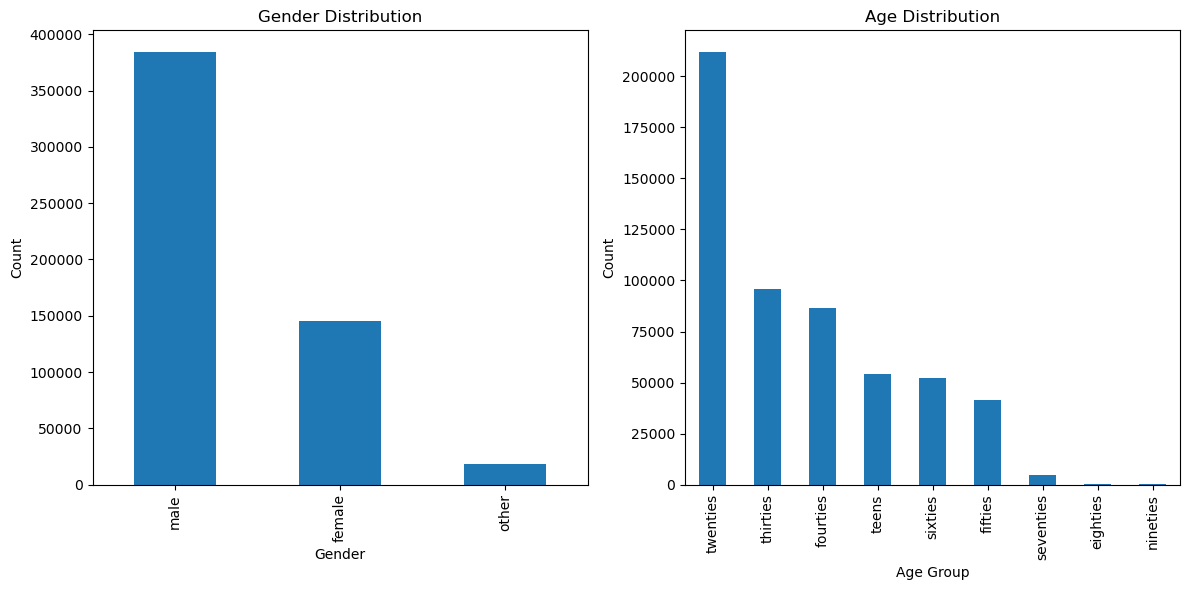

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [9]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [11]:
import pandas as pd
import numpy as np

# Define the variables
F10 = 'F10'
M10 = 'M10'
F20 = 'F20'
M20 = 'M20'
F30 = 'F30'
M30 = 'M30'
F40 = 'F40'
M40 = 'M40'
F50 = 'F50'
M50 = 'M50'
F60 = 'F60'
M60 = 'M60'
# Assign the 'class' values
#metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'female'), "class"] = F10
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'male'), "class"] = M10

#metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'female'), "class"] = F20
metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'male'), "class"] = M20

#metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'female'), "class"] = F30
metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'male'), "class"] = M30

#metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'female'), "class"] = F40
metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'male'), "class"] = M40

#metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'female'), "class"] = F50
metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'male'), "class"] = M50

#metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'female'), "class"] = F60
metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'male'), "class"] = M60


In [12]:
metadata_df.dropna(subset=["class"], inplace=True)

metadata_df["class"] = metadata_df["class"].astype(int)

In [13]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


In [14]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment class  
0       NaN     NaN    NaN     en      NaN   nan  
1  twenties  female     us     en      NaN   F20  
2  twenties  female     us     en      NaN   F20  
3  twenties  female     us     en      NaN   F20  
4  twenties  female     us     en      NaN   F20

#Assuming 'metadata_df' is your DataFrame containing the data
metadata_df = metadata_df.reset_index(drop=True)

#Assign class labels based on age
metadata_df.loc[(metadata_df["age"] == 'teens'), "class"] = 10
metadata_df.loc[(metadata_df["age"] == 'twenties'), "class"] = 20
metadata_df.loc[(metadata_df["age"] == 'thirties'), "class"] = 30
metadata_df.loc[(metadata_df["age"] == 'fourties'), "class"] = 40
metadata_df.loc[(metadata_df["age"] == 'fifties'), "class"] = 50
metadata_df.loc[(metadata_df["age"] == 'sixties'), "class"] = 60

#Separate data by gender
male_df = metadata_df[metadata_df['gender'] == 'male']
female_df = metadata_df[metadata_df['gender'] == 'female']

#Randomly select 40,000 samples for each gender
male_df = male_df.sample(n=378614, random_state=42)
female_df = female_df.sample(n=142548, random_state=42)

#Select 25,000 male and 15,000 female samples for the training subset
train_male_df = male_df.sample(n=25000, random_state=42)
train_female_df = female_df.sample(n=15000, random_state=42)

#Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

import pandas as pd
import numpy as np

# Define the variables
F10 = 'F10'
M10 = 'M10'
F20 = 'F20'
M20 = 'M20'
F30 = 'F30'
M30 = 'M30'
F40 = 'F40'
M40 = 'M40'
F50 = 'F50'
M50 = 'M50'
F60 = 'F60'
M60 = 'M60'

# Create an empty DataFrame
metadata_df = pd.DataFrame(columns=['age', 'gender', 'path', 'sentence', 'up_votes', 'down_votes', 'accent', 'locale', 'segment', 'class'])

# Assign the 'class' values
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'female'), "class"] = F10
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'male'), "class"] = M10

metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'female'), "class"] = F20
metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'male'), "class"] = M20

metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'female'), "class"] = F30
metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'male'), "class"] = M30

metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'female'), "class"] = F40
metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'male'), "class"] = M40

metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'female'), "class"] = F50
metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'male'), "class"] = M50

metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'female'), "class"] = F60
metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'male'), "class"] = M60

# Generate female samples
female_ages = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']
for age in female_ages:
    metadata_df = pd.concat([metadata_df, pd.DataFrame({'age': [age] * 500, 'gender': ['female'] * 500, 'class': ['F' + age[0].upper() + age[1:]] * 500})])

# Generate male samples
male_ages = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']
for age in male_ages:
    metadata_df = pd.concat([metadata_df, pd.DataFrame({'age': [age] * 1500, 'gender': ['male'] * 1500, 'class': ['M' + age[0].upper() + age[1:]] * 1500})])

# Verify the DataFrame
print("Value counts of 'class' and 'gender':")
print(metadata_df.value_counts(['class', 'gender']))

# Group the data by the "class" and "gender" columns
grouped = metadata_df.groupby(["class", "gender"])

# Determine the desired sample size per class and gender
desired_samples_per_class_gender = 2000  # Ensure there are at least 2,000 samples per class and gender

# Randomly select samples from each class and gender, capped at the desired sample size per class and gender
train_df_list = []
for (class_label, gender), group in grouped:
    male_group = group[group['gender'] == 'male']
    female_group = group[group['gender'] == 'female']
    
    # Ensure at least 2,000 samples per class and gender
    male_samples = min(desired_samples_per_class_gender, len(male_group))
    female_samples = min(desired_samples_per_class_gender, len(female_group))
    
    train_df_list.append(male_group.sample(n=male_samples, replace=True, random_state=42))
    train_df_list.append(female_group.sample(n=female_samples, replace=True, random_state=42))

# Combine the training subset
train_df = pd.concat(train_df_list, ignore_index=True)

# Ensure the sample sizes are exactly 18,000 male and 6,000 female
male_df = train_df[train_df['gender'] == 'male']
female_df = train_df[train_df['gender'] == 'female']

train_male_df = male_df.sample(n=18000, replace=True, random_state=42)
train_female_df = female_df.sample(n=6000, replace=True, random_state=42)

# Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

In [15]:
# Get the counts for each gender-age group
female_counts = metadata_df.loc[metadata_df["gender"] == 'female'].groupby("class").size()
male_counts = metadata_df.loc[metadata_df["gender"] == 'male'].groupby("class").size()

# Adjust the sample sizes based on the available data
#f10_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F10')].sample(n=min(1000, female_counts['F10']), random_state=42)
#f20_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F20')].sample(n=min(1000, female_counts['F20']), random_state=42)
#f30_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F30')].sample(n=min(1000, female_counts['F30']), random_state=42)
#f40_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F40')].sample(n=min(1000, female_counts['F40']), random_state=42)
#f50_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F50')].sample(n=min(1000, female_counts['F50']), random_state=42)
#f60_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F60')].sample(n=min(1000, female_counts['F60']), random_state=42)

m10_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M10')].sample(n=min(3000, male_counts['M10']), random_state=42)
m20_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M20')].sample(n=min(3000, male_counts['M20']), random_state=42)
m30_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M30')].sample(n=min(3000, male_counts['M30']), random_state=42)
m40_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M40')].sample(n=min(3000, male_counts['M40']), random_state=42)
m50_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M50')].sample(n=min(3000, male_counts['M50']), random_state=42)
m60_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M60')].sample(n=min(3000, male_counts['M60']), random_state=42)

# Concatenate the samples back into the metadata_df
metadata_df = pd.concat([
    m10_samples,
    m20_samples,
    m30_samples,
    m40_samples,
    m50_samples,
    m60_samples
], ignore_index=True)

### metadata_df.head()

In [16]:
#After Decreasing the Speeach Data
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 18000
Total male samples: 18000
Total female samples: 0


In [17]:
metadata_df.head()

client_id  \
0  d72f02ca7c7782b19a2edfbef25f54b5c0cdb637c98045...   
1  2f4dc5eda973d3417eb06536b3f01c6f18c7dc619f755a...   
2  f22799b9561d8188b3941d8305b9b6a9db949a58581002...   
3  a4224e9a7a4ca9d1497e79e4a1d8ebf48aada2e80dfa22...   
4  e30bbf8117ee1a644fc59c78fd9f878c6c3d67f82ae04f...   

                           path  \
0  common_voice_en_23597942.mp3   
1  common_voice_en_20008893.mp3   
2  common_voice_en_18753383.mp3   
3  common_voice_en_19020931.mp3   
4  common_voice_en_18641865.mp3   

                                            sentence  up_votes  down_votes  \
0       The festival is organized annually in April.         2           0   
1  The infrared light pulses form a pattern uniqu...         2           0   
2  Procedures for specifying the name and updatin...         2           1   
3  Bill Miller contributed several beautifully co...         2           0   
4                         I have one other petition.         2           1   

     age gender     accent locale  segment class  
0  teens   male         us     en      NaN   M10  
1  teens   male     canada     en      NaN   M10  
2  teens   male         us     en      NaN   M10  
3  teens   male  singapore     en      NaN   M10  
4  teens   male        NaN     en      NaN   M10

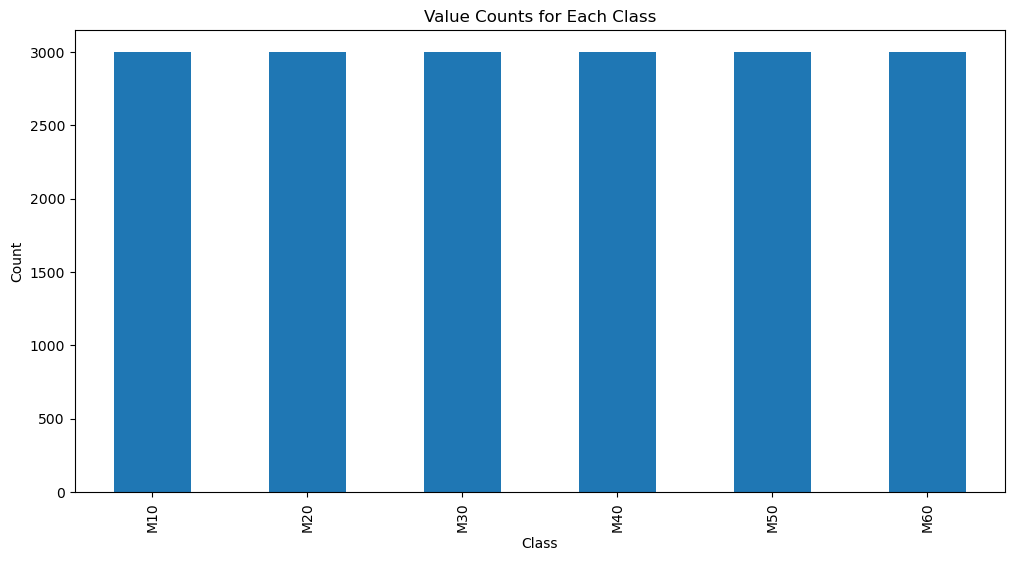

In [18]:
import matplotlib.pyplot as plt

# Get the value counts for each class
class_counts = metadata_df['class'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Value Counts for Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
metadata_df.groupby("class")["class"].unique()

class
M10    [M10]
M20    [M20]
M30    [M30]
M40    [M40]
M50    [M50]
M60    [M60]
Name: class, dtype: object

In [20]:
metadata_df.head(55)

client_id  \
0   d72f02ca7c7782b19a2edfbef25f54b5c0cdb637c98045...   
1   2f4dc5eda973d3417eb06536b3f01c6f18c7dc619f755a...   
2   f22799b9561d8188b3941d8305b9b6a9db949a58581002...   
3   a4224e9a7a4ca9d1497e79e4a1d8ebf48aada2e80dfa22...   
4   e30bbf8117ee1a644fc59c78fd9f878c6c3d67f82ae04f...   
5   6a7a628e94847deecbea52f9d3a8e4f89c47a10f219278...   
6   05bfb787a2fe71560f433afa69df0e5af51b561e188c11...   
7   f10f2d35a7e480d9c915abea6a94cf0ed8edd07424065e...   
8   6dfeef5f264dc436a79b00223f44175e021c493c1992e1...   
9   29b1e5a58d1667d4ac45832ec195356598a69f66680877...   
10  81b0bd1eb02e55a4d4f6661f34d1fb6c27778c68890b27...   
11  fe75e19e17671fabb0eb09f1816402ada7b5211ad7c06a...   
12  bbd75f4b7f3ea8720e67318bd252bdf0a50f22ed083368...   
13  1a0975b1ae84607ddf4d5c1ca53e23d0e983ad13bdbe9e...   
14  415181dd3f1c55f1a85159db41044b2670e5ac4617530d...   
15  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
16  248a84eca47ed8ee00f49020d139fd5ce3b2e2b1316899...   
17  68ff506792c0fa71017ce012f122f3778ad0e8f4a54e04...   
18  4b38682ffcf05399a681bc34dff9b19f893ffdf2e3dcfb...   
19  ca4d4da2a8deab111c266ee13cc49978cc283e77b0ff4b...   
20  8defb7e4299c0a469cd73d0a1a60a07392ba2cf9b38cfb...   
21  46ceb53912b31b2fd62dbab07d0eb42d6552d95160d310...   
22  26b93e2671dcf919544b6a98332a6cc231c4ba72a342d4...   
23  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
24  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
25  eb0cf518c980fbaafc44b52459e6edc777cf01758412dc...   
26  c46b47eb5d1c58daa8212ea8ef73c27d0f4ff0f44d8a0e...   
27  12b03d1263d68cdd80951170c1e4f0358157b25ebc336c...   
28  d074fb85eeb81ba8a3ed52b06f56736547c8cf012ecd3b...   
29  f22799b9561d8188b3941d8305b9b6a9db949a58581002...   
30  e8eddb12ff26fa9c66763a8a83d463d741045ed4b1004a...   
31  d90cf3237cd1324308c7b1e7e4182357b336a49685eeef...   
32  6091c9894d84f8d08937333a1a7504916a027c4bd134e2...   
33  6b0cfd3b964d74c21ffdf92e02abb25fb838ea7664ff91...   
34  f22799b9561d8188b3941d8305b9b6a9db949a58581002...   
35  ad18305eb8ef4812f11208a027ce49d5e99dcc37b6c0d6...   
36  d80d17fa679917ae502e3d061aaf1044a793ee69886aac...   
37  483518b7d9669659c0bdf5ead2388c590f85a56fff5b65...   
38  bc636bf2d395d2c1e859979f0222c61a368685d72fea6a...   
39  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
40  672a2889c9c8789dfd0e0d275b6d7cc2f0b0b71f31a8a6...   
41  d8f4d9ae414f5f5c16b558e5bc8441d776ff03c66f43d3...   
42  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
43  a9409655b30a57a4a2f9e47a423bc5dd8e916d26d3c0e7...   
44  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
45  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
46  94b90b34738dbd5fe3b0989db0e78f2045038c75e26a4f...   
47  505d3052b731e49ad6c4f40931ba42bff7a9046b894c67...   
48  fcffb37fddeaa6cbdda86f7d25e57e69c00d260fc22caa...   
49  973d13811ac3c54039c7f56ac9ee52916eb0f4fa366591...   
50  46ceb53912b31b2fd62dbab07d0eb42d6552d95160d310...   
51  e632f7576952a3267e4ccfcd8c5c9d6d43aeb0d92a2a9e...   
52  aa405ba862e5e1160ae65cdc4c1214b7f1f3d620a3a1a1...   
53  7f84b21d2b23c7497ab4faa9c1f408d47bf1258565ad59...   
54  eb52395506bbe77b60890179860a28918760bae3b068ba...   

                            path  \
0   common_voice_en_23597942.mp3   
1   common_voice_en_20008893.mp3   
2   common_voice_en_18753383.mp3   
3   common_voice_en_19020931.mp3   
4   common_voice_en_18641865.mp3   
5   common_voice_en_24598341.mp3   
6   common_voice_en_22748867.mp3   
7   common_voice_en_21231105.mp3   
8   common_voice_en_24988396.mp3   
9   common_voice_en_23930258.mp3   
10  common_voice_en_21020426.mp3   
11  common_voice_en_20895500.mp3   
12  common_voice_en_21766275.mp3   
13  common_voice_en_21340378.mp3   
14  common_voice_en_20008921.mp3   
15  common_voice_en_20882901.mp3   
16  common_voice_en_18652879.mp3   
17  common_voice_en_22255001.mp3   
18  common_voice_en_24958074.mp3   
19  common_voice_en_22144922.mp3   
20  common_voice_en_20105019.mp3   
21  common_voice_en_23404556.mp3   
22  common_voice_en_230

In [21]:
metadata_df.groupby("class")["class"].unique()

class
M10    [M10]
M20    [M20]
M30    [M30]
M40    [M40]
M50    [M50]
M60    [M60]
Name: class, dtype: object

In [22]:
metadata_df.groupby("age")["age"].unique()

age
fifties      [fifties]
fourties    [fourties]
sixties      [sixties]
teens          [teens]
thirties    [thirties]
twenties    [twenties]
Name: age, dtype: object

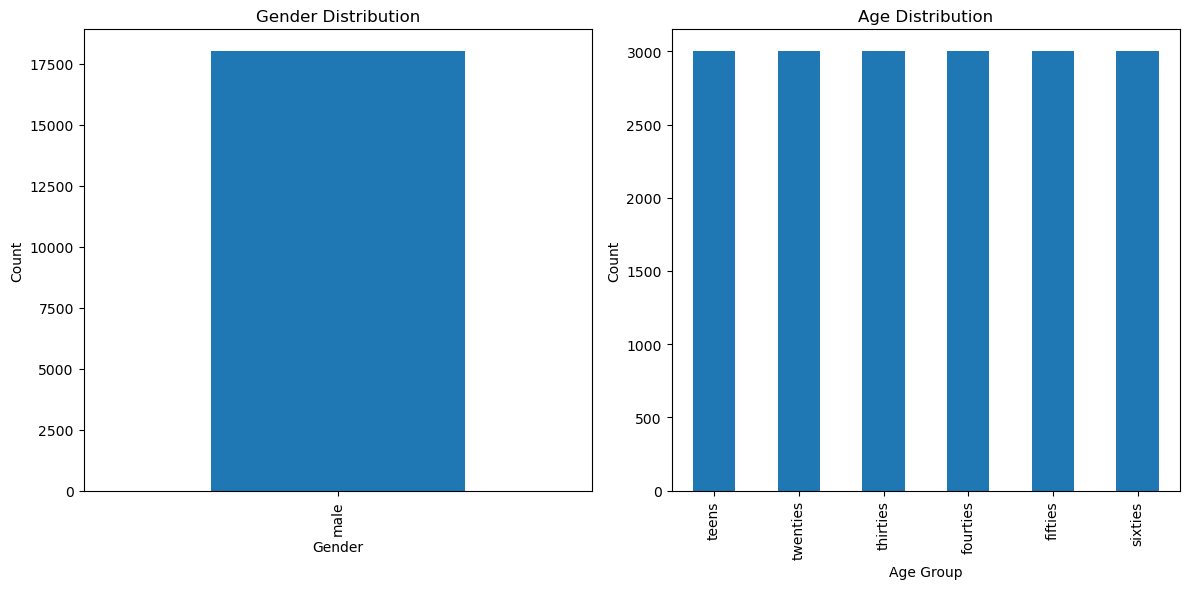

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [25]:
 metadata_df.count()

client_id     18000
path          18000
sentence      18000
up_votes      18000
down_votes    18000
age           18000
gender        18000
accent        12781
locale        18000
segment           0
class         18000
dtype: int64

In [26]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200

Text(0.5, 1.0, 'Gender')

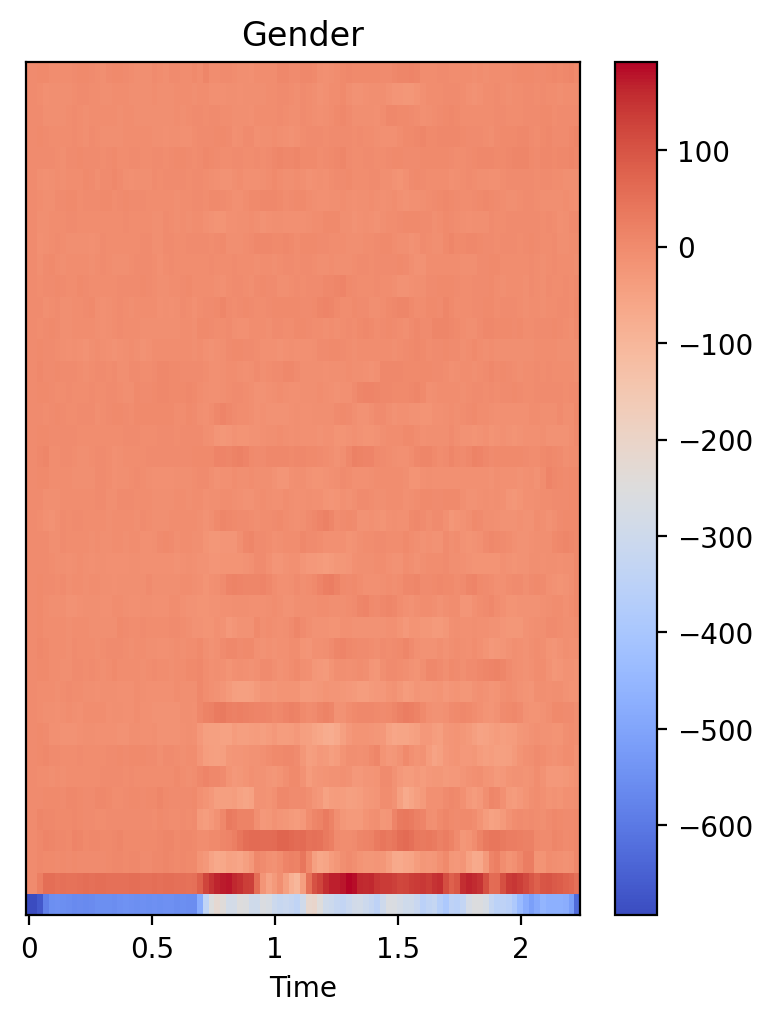

In [27]:

audio_path =  "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_1.mp3"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("Gender")

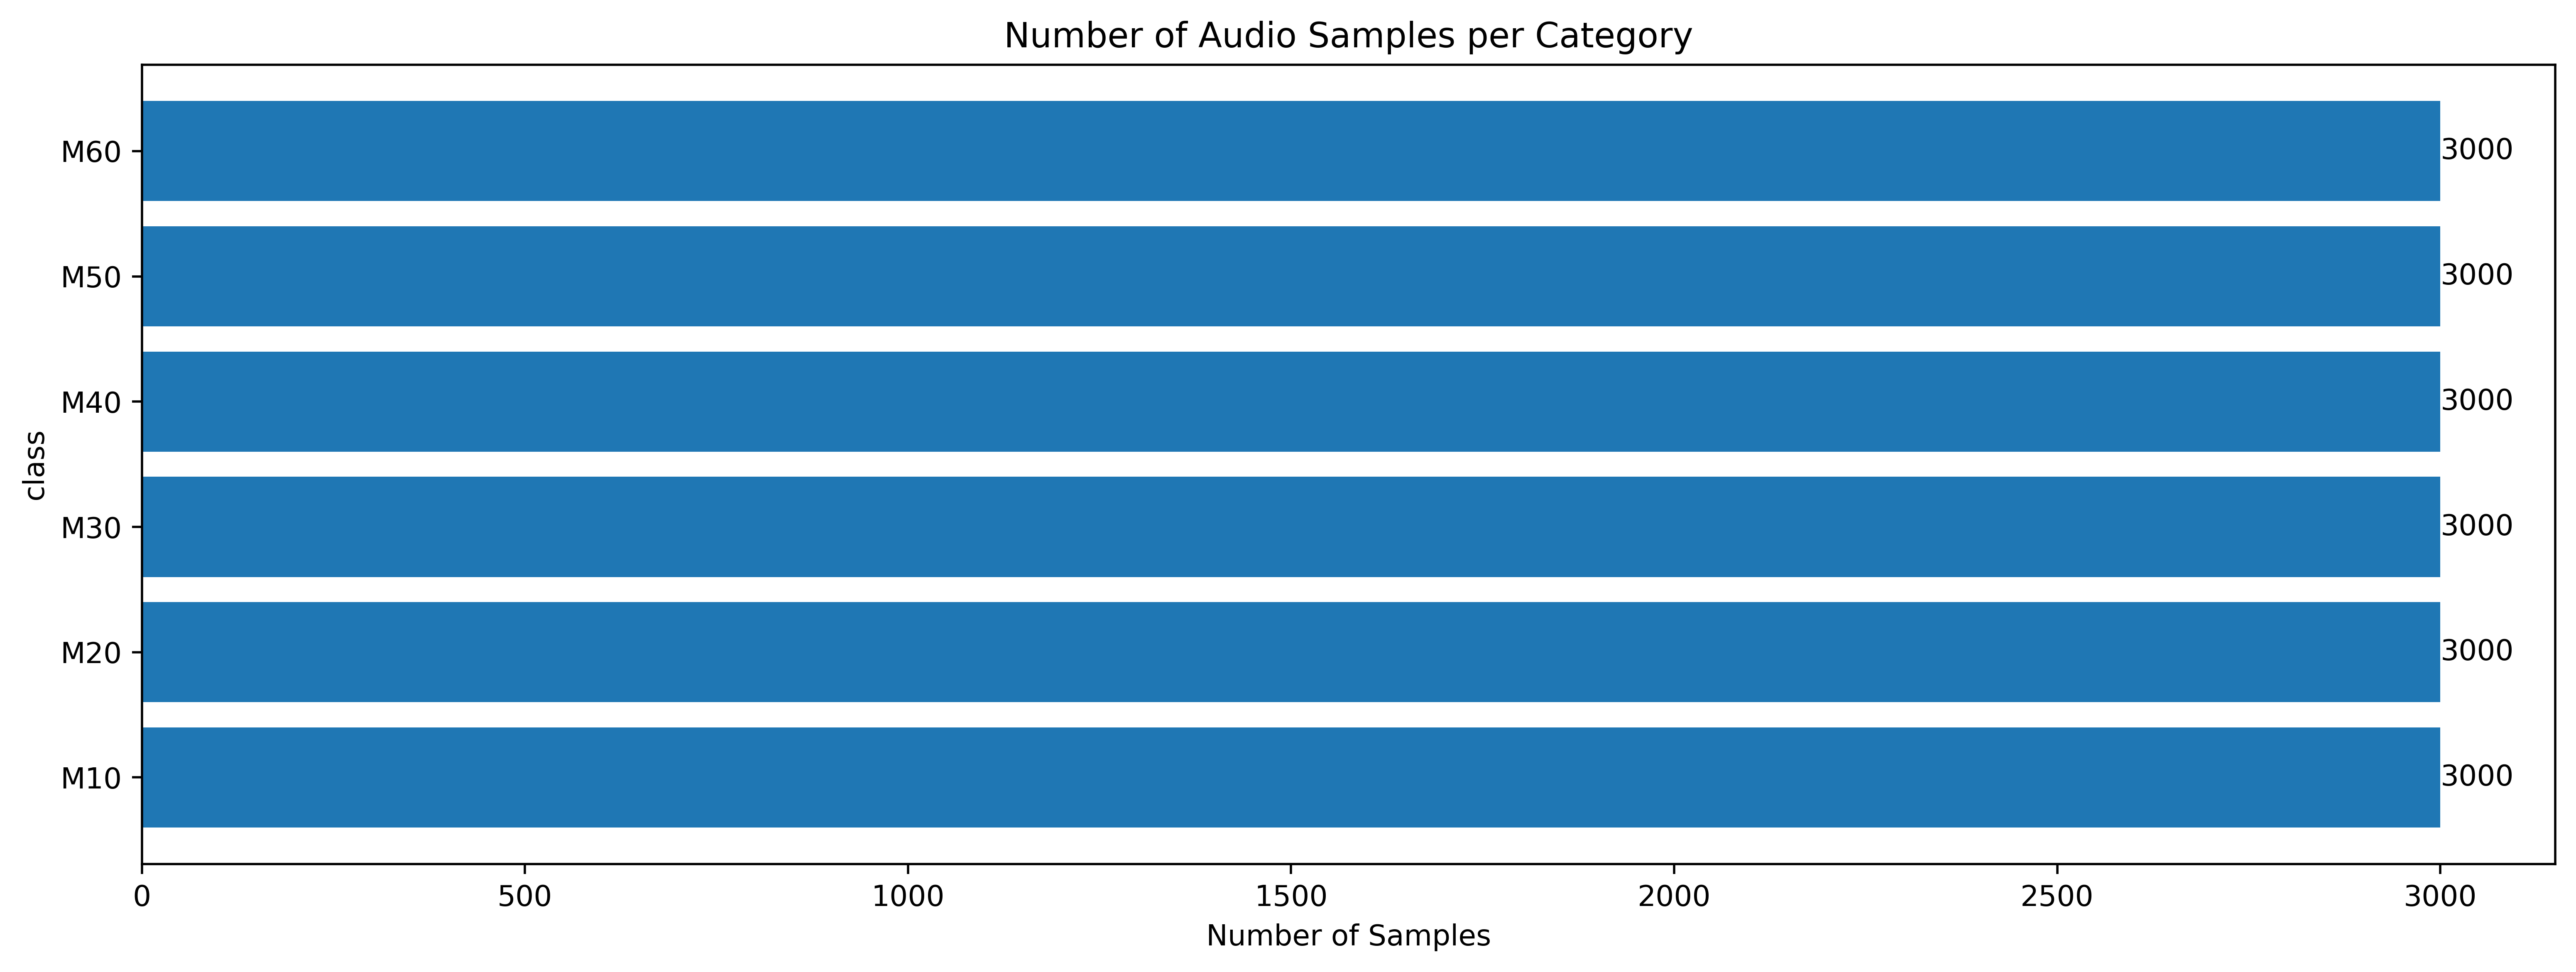

In [28]:
x = metadata_df["class"].unique()
y = metadata_df["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("class")
plt.show()

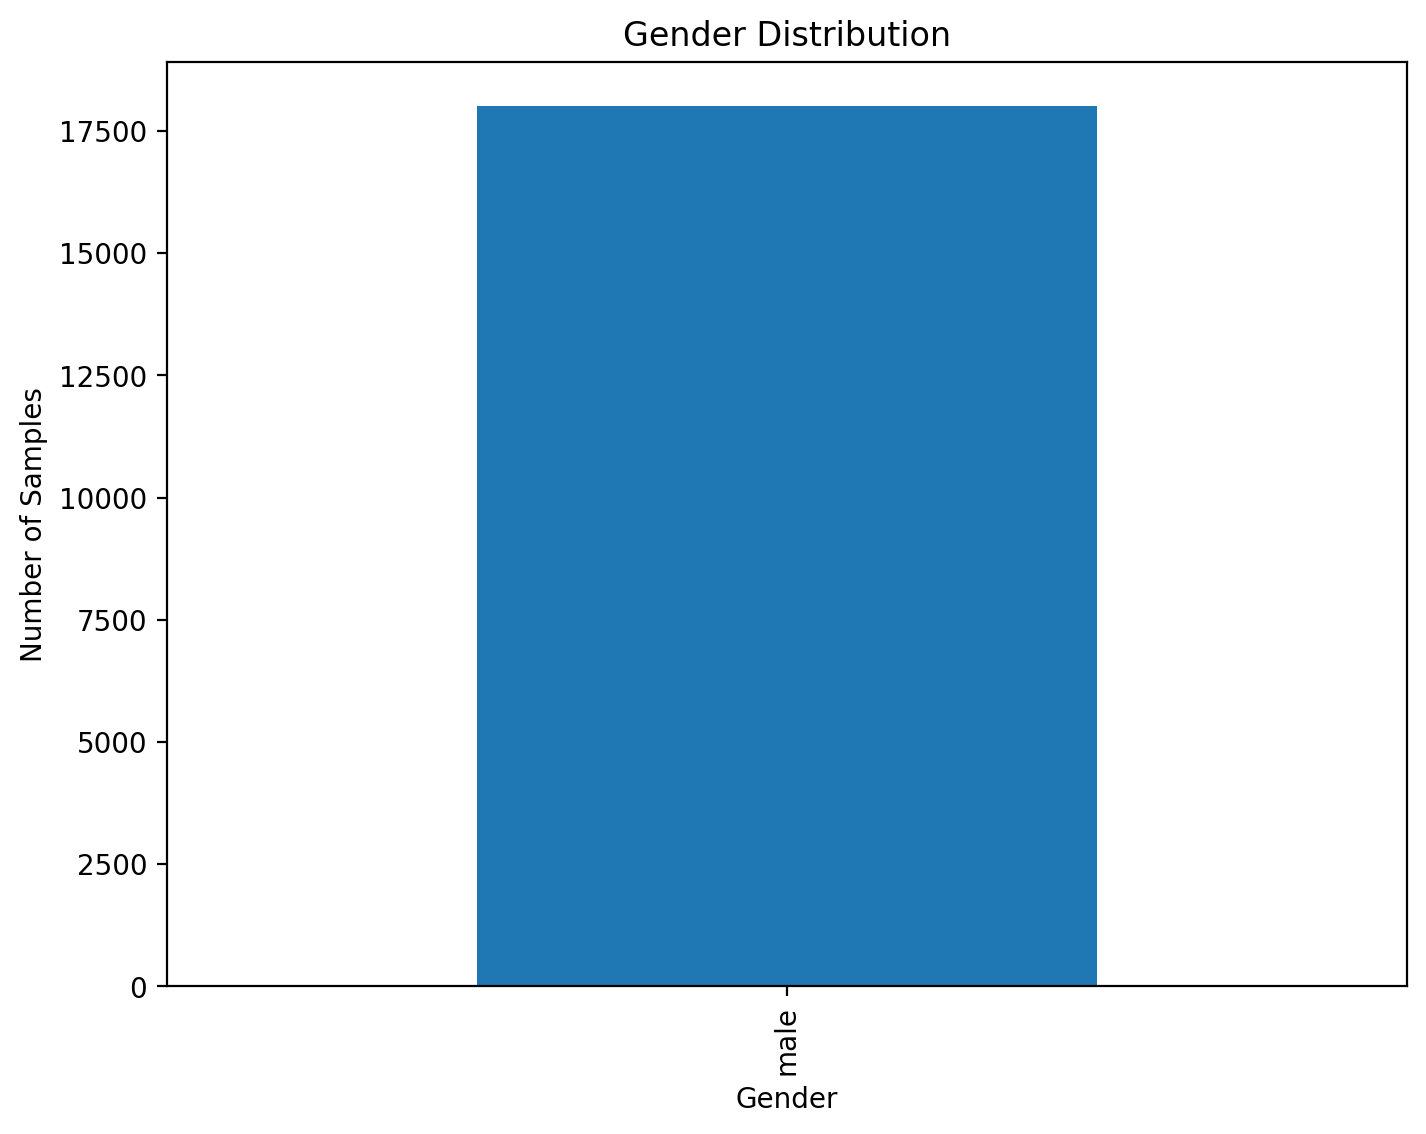

In [29]:
import matplotlib.pyplot as plt

# Plot histogram for gender
plt.figure(figsize=(8, 6))
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [30]:
import IPython.display as ipd
import librosa
import lazy_loader as lazy
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [31]:
#!pip install resampy

In [32]:
#!pip install --upgrade librosa

In [33]:
#!pip install resampy

In [34]:
#!pip3 install resampy

In [35]:
#!pip install pandas

In [36]:
import resampy

In [37]:
#!pip install --upgrade librosa

In [38]:
metadata_df.head()

client_id  \
0  d72f02ca7c7782b19a2edfbef25f54b5c0cdb637c98045...   
1  2f4dc5eda973d3417eb06536b3f01c6f18c7dc619f755a...   
2  f22799b9561d8188b3941d8305b9b6a9db949a58581002...   
3  a4224e9a7a4ca9d1497e79e4a1d8ebf48aada2e80dfa22...   
4  e30bbf8117ee1a644fc59c78fd9f878c6c3d67f82ae04f...   

                           path  \
0  common_voice_en_23597942.mp3   
1  common_voice_en_20008893.mp3   
2  common_voice_en_18753383.mp3   
3  common_voice_en_19020931.mp3   
4  common_voice_en_18641865.mp3   

                                            sentence  up_votes  down_votes  \
0       The festival is organized annually in April.         2           0   
1  The infrared light pulses form a pattern uniqu...         2           0   
2  Procedures for specifying the name and updatin...         2           1   
3  Bill Miller contributed several beautifully co...         2           0   
4                         I have one other petition.         2           1   

     age gender     accent locale  segment class  
0  teens   male         us     en      NaN   M10  
1  teens   male     canada     en      NaN   M10  
2  teens   male         us     en      NaN   M10  
3  teens   male  singapore     en      NaN   M10  
4  teens   male        NaN     en      NaN   M10

In [39]:
import os
import librosa
import numpy as np
from tqdm import tqdm

# List to store the extracted features and labels
extracted = []

# Iterate over each row in the DataFrame within the specified range
#for index_num, row in tqdm(metadata_df.iloc[:1045].iterrows()):
#for index_num, row in tqdm(metadata_df.iloc[:120002].iterrows()):
for index_num, row in tqdm(metadata_df.iloc[:17999].iterrows()):
    # Get the file path
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    
    # Get the file label
    final_class_label = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    
    # Extract the features (MFCC)
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling
    scaled_features = np.mean(features.T, axis=0)
    
    # Store the features and label in the list
    extracted.append([scaled_features, final_class_label])

17999it [34:08,  8.79it/s]


desired_duration=10
def feature_extractor(filename):
    data,sr = librosa.load(filename, duration = desired_duration, res_type='kaise_best')
    if len(data) < sr * desired_duration:
        data = np.pad(data, (0, sr * desired_duration - len(data)))
         
    
    mfcc_features = librosa.feature.mfcc(y=data,sr=samp_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

#Runtime - 2min 14 sec 775 iterations for 3 clips per bird
from tqdm import tqdm #Allows to see progress
extracted_features=[]
for index_num,row in tqdm(metadata_df.iterrows()):
    final_class_labels=row["class"]
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    data=feature_extractor(file_path)
    extracted_features.append([data,final_class_labels])

In [40]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_dffinalmale6class.pkl")
extracted_df.head(50)

feature class
0   [-329.77493, 76.54689, 19.301815, 18.925772, 6...   M10
1   [-327.14838, 141.55014, 0.3718586, 11.837025, ...   M10
2   [-362.4073, 118.10851, 24.420528, 20.582458, 1...   M10
3   [-318.8614, 78.71081, 40.68063, 31.881021, 12....   M10
4   [-377.89908, 107.37226, -3.7291043, 42.271168,...   M10
5   [-343.50177, 62.98146, 42.313423, 30.617668, 1...   M10
6   [-353.18475, 119.87709, 22.765831, 34.910347, ...   M10
7   [-398.4527, 97.00206, 11.904051, 47.545376, 18...   M10
8   [-395.79535, 68.74316, 25.086493, 22.203331, -...   M10
9   [-266.23666, 57.966667, -26.685074, 45.47216, ...   M10
10  [-433.84604, 101.83506, 15.151163, 46.666035, ...   M10
11  [-623.5551, 52.82093, -23.137165, 23.495531, -...   M10
12  [-267.24124, 70.43163, -15.529571, 25.200125, ...   M10
13  [-336.4277, 150.78366, -6.2136774, 29.421146, ...   M10
14  [-316.71405, 82.46271, -8.530572, 25.364399, 1...   M10
15  [-322.24844, 107.633446, 0.9690113, 18.509518,...   M10
16  [-439.98404, 78.886856, -15.027694, 46.667313,...   M10
17  [-342.41852, 84.468414, -5.7007575, 14.153241,...   M10
18  [-462.62863, 92.58584, -3.0279906, 40.553932, ...   M10
19  [-388.72177, 95.084465, -23.626978, 16.11372, ...   M10
20  [-264.3619, 78.59689, -11.786279, 9.287144, -4...   M10
21  [-330.43646, 159.13684, -8.834188, 19.550451, ...   M10
22  [-481.38904, 52.49856, -24.702888, 12.348497, ...   M10
23  [-271.0203, 87.13038, -40.19209, 60.249966, -9...   M10
24  [-291.51495, 93.4101, -27.748243, 44.426064, -...   M10
25  [-293.03442, 50.43122, 38.308266, 5.7246094, -...   M10
26  [-312.63422, 118.03263, -2.842948, 28.475464, ...   M10
27  [-414.01288, 74.63667, 25.779005, 26.243357, -...   M10
28  [-314.67273, 76.65228, -10.521295, 10.732451, ...   M10
29  [-342.95584, 91.01948, -28.456133, 5.729135, -...   M10
30  [-360.8039, 58.17789, -24.980642, 25.48838, -2...   M10
31  [-363.58658, 85.9428, 16.63276, 49.117657, -15...   M10
32  [-445.84842, 69.327415, 21.011889, 1.6950378, ...   M10
33  [-462.9366, 93.92261, -20.271395, 35.23396, -1...   M10
34  [-411.5111, 40.866055, -10.971526, 39.12261, -...   M10
35  [-253.77762, 67.85008, 22.63894, 28.167397, 0....   M10
36  [-433.7414, 109.09596, -4.511369, 29.18483, 15...   M10
37  [-381.15067, 57.834614, -24.763641, 44.655132,...   M10
38  [-319.52444, 75.41625, 16.99241, 26.592365, -1...   M10
39  [-257.36783, 109.454704, -33.452038, 51.438496...   M10
40  [-463.84723, 102.3344, 26.720888, 48.948383, 1...   M10
41  [-296.60977, 86.88947, -8.504295, 30.262434, -...   M10
42  [-264.76038, 105.400116, -39.230133, 51.503044...   M10
43  [-437.32468, 109.64432, -0.7708154, 32.928772,...   M10
44  [-284.14264, 115.55801, -26.247297, 43.80121, ...   M10
45  [-376.49124, 94.18001, 10.169774, 41.208298, 5...   M10
46  [-283.61215, 144.35535, 14.557864, 27.615465, ...   M10
47  [-321.3861, 91.73702, 3.750396, 37.679417, 29....   M10
48  [-279.4154, 104.26219, -27.727104, 39.53619, -...   M10
49  [-413.2547, 109.72858, -15.646046, 20.924728, ...   M10

# create a new dataframe
extracted = []
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df1.pkl")
extracted_df.head(55)

## Data Preprocessing
### Distribute the data to X and Y

In [41]:
final = pd.read_pickle("extracted_dffinalmale6class.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

### Split the data into train and test sets

In [42]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  14399
Number of testing samples =  3600


### Model 1 - ANN
#### Building the model

In [43]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,410,956 (5.38 MB)

 Trainable params: 1,410,956 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model

In [44]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Fitting the model

In [45]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("ANN_Model.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2802 - loss: 2.7482 - val_accuracy: 0.4592 - val_loss: 1.3359
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4497 - loss: 1.3489 - val_accuracy: 0.4842 - val_loss: 1.3420
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4930 - loss: 1.2419 - val_accuracy: 0.5006 - val_loss: 1.2071
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5345 - loss: 1.1581 - val_accuracy: 0.5639 - val_loss: 1.1198
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5904 - loss: 1.0521 - val_accuracy: 0.5869 - val_loss: 1.1053
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6199 - loss: 0.9842 - val_accuracy: 0.6161 - val_loss: 0.9901
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6592 - loss: 0.8912 - val_accuracy: 0.6331 - val_loss: 0.9643
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6804 - loss: 0.8335 - val_accu

ANN Model Saved


## Results

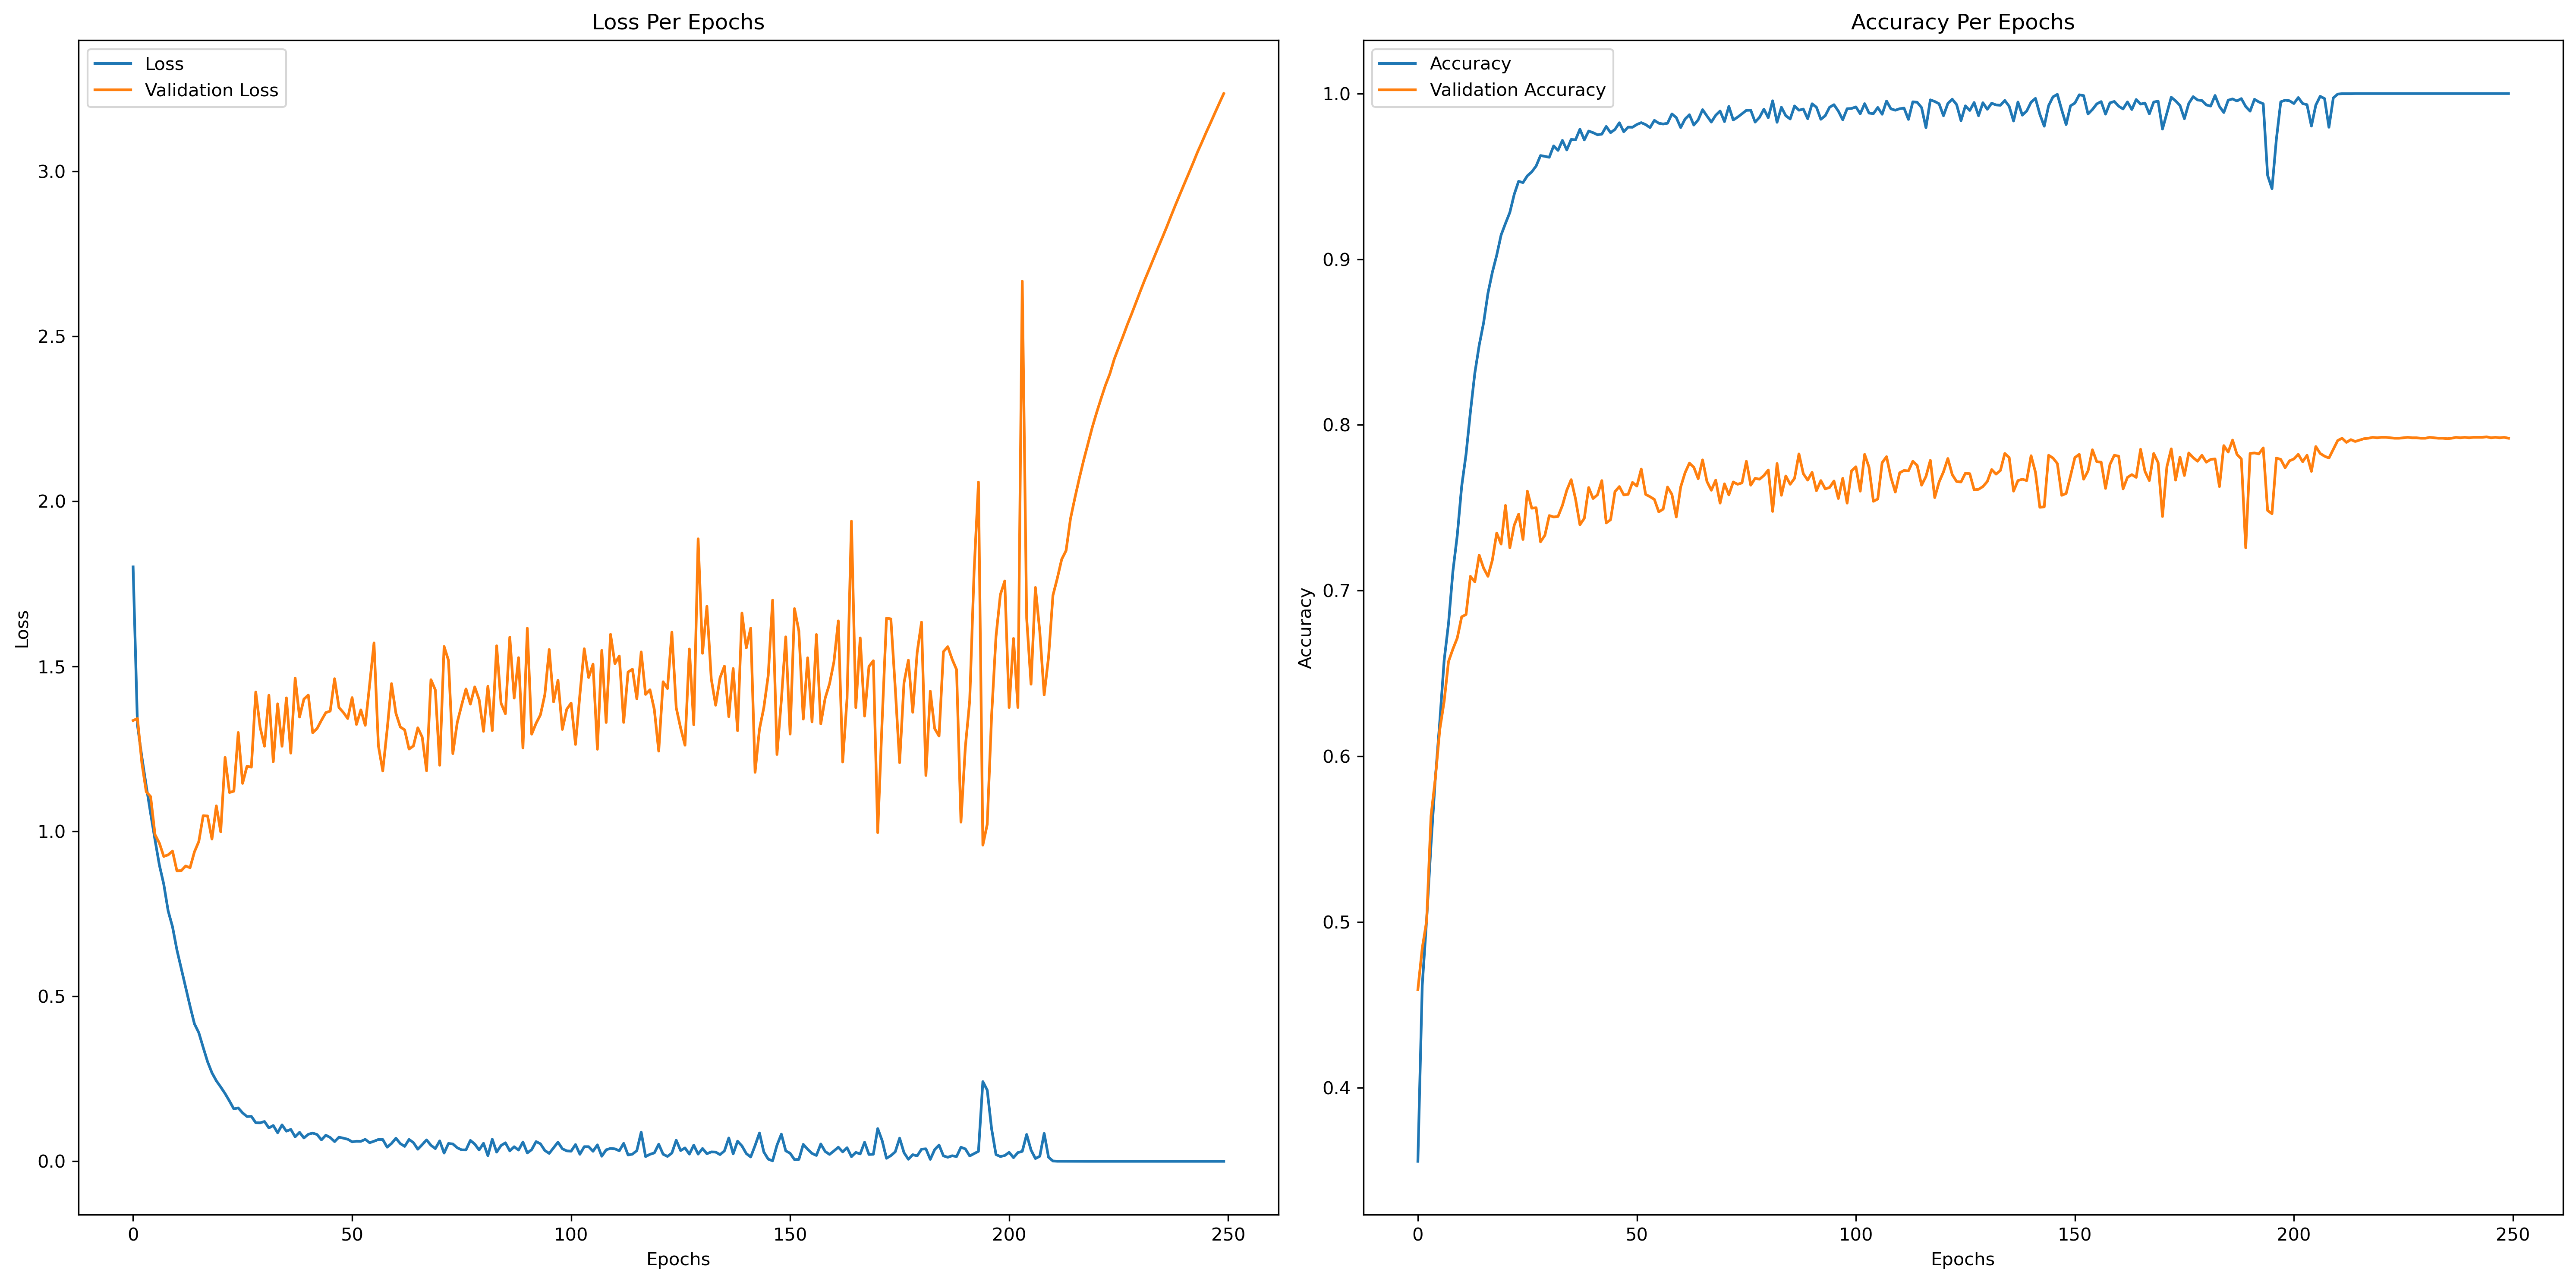

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [52]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [53]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])

In [54]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_18944712.mp3"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
ANN has predicted the class as  -->  M10


In [55]:
# Evaluate the performance of the speaker recognition model
speaker_loss, speaker_accuracy = ANN_Model.evaluate(X_test, y_test)
print(f"Speaker Recognition Accuracy: {speaker_accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 3.3878
Speaker Recognition Accuracy: 79.19%


In [56]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['M10', 'M20', 'M30', 'M40', 'M50', 'M60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       593
           1       0.63      0.69      0.66       605
           2       0.71      0.71      0.71       599
           3       0.91      0.82      0.86       635
           4       0.86      0.85      0.86       583
           5       0.90      0.94      0.92       585

    accuracy                           0.79      3600
   macro avg       0.80      0.79      0.79      3600
weighted avg       0.80      0.79      0.79      3600

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         M10       0.76      0.75      0.75       593
         M20       0.63      0.69      0.66       605
         M30       0.71      0.71      0.71       599
         M40       0.91      0.82      0.86       635
         M50       0.86      0.85      0.86       583
         M60       0.90      0.94      0.92       

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[442  84  38   7  13   9]
 [ 55 420  72  17  23  18]
 [ 45  80 424  18  20  12]
 [ 21  35  38 520  16   5]
 [ 16  30  20   7 495  15]
 [  4  14   9   1   7 550]]


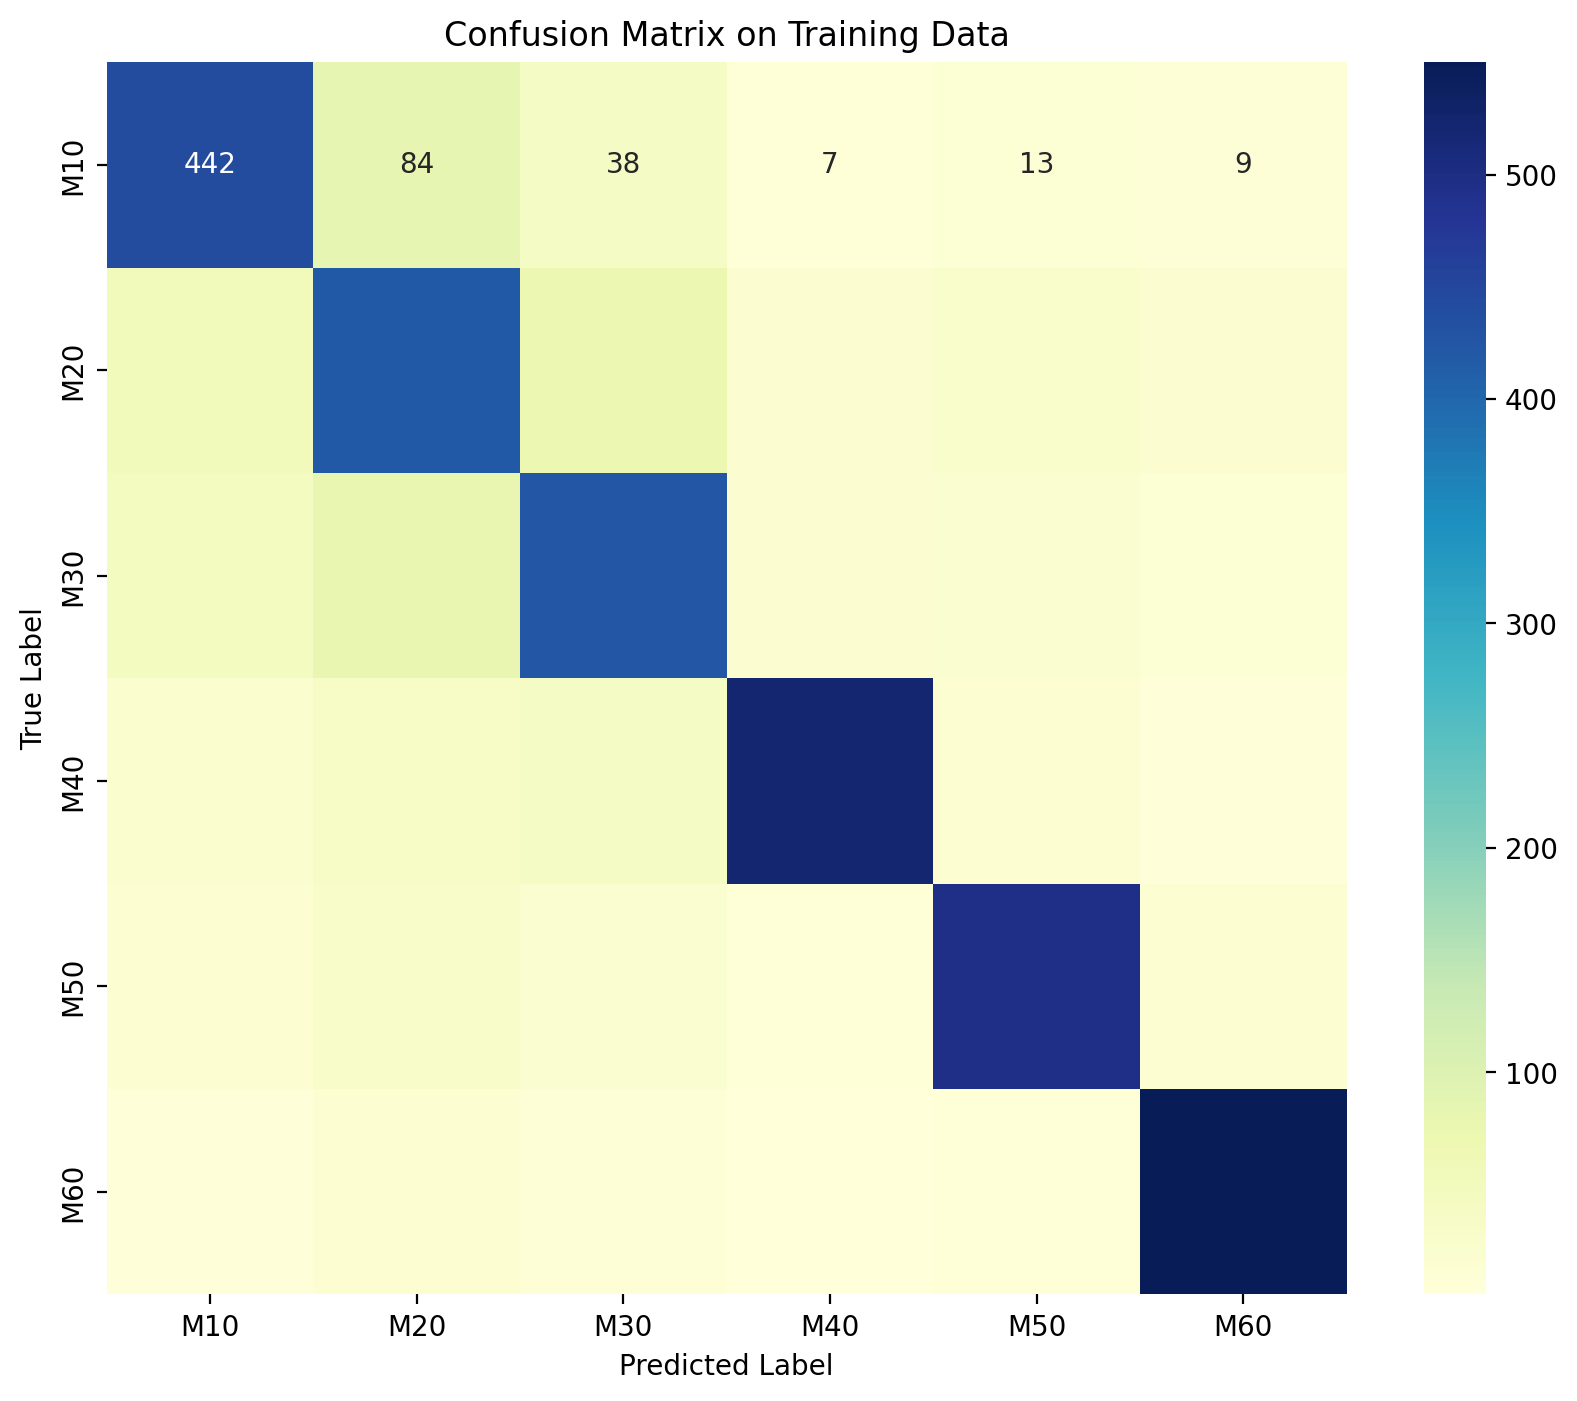

Accuracy   : 0.7919444444444445
Precision  : 0.7958154054527838
Recall     : 0.7925915052825178
F1-score   : 0.7934721131244743


In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = ANN_Model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[M10,M20,M30,M40,M50,M60], columns=[M10,M20,M30,M40,M50,M60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

## Model 2 - CNN### 
Preprocessing

In [60]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1000, activation='relu'))
cnn_model.add(Dense(750, activation='relu'))
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(50, activation='relu'))
num_classes = 6 # Replace 3 with the actual number of classes in your data
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1000)           │     3,841,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147,916 (19.64 MB)

 Trainable params: 5,147,916 (19.64 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_results=cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.3201 - loss: 1.6197 - val_accuracy: 0.4536 - val_loss: 1.2829
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5135 - loss: 1.1925 - val_accuracy: 0.5403 - val_loss: 1.1511
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6016 - loss: 1.0214 - val_accuracy: 0.6400 - val_loss: 0.9531
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6929 - loss: 0.8147 - val_accuracy: 0.6583 - val_loss: 0.9287
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7780 - loss: 0.6168 - val_accuracy: 0.6931 - val_loss: 0.8867
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8356 - loss: 0.4541 - val_accuracy: 0.6958 - val_loss: 0.9016
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8883 - loss: 0.3189 - val_accuracy: 0.7153 - val_loss: 1.0153
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9282 - loss: 0.21

In [62]:
cnn_model.save("cnn_model.h5")
print("cnn_model  Saved")

cnn_model  Saved


In [63]:
train_hist_m2 = pd.DataFrame(cnn_results.history)
train_m2 = round(time.time() - t0, 3)

In [64]:
# function to predict the feature
def CNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(cnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN has predicted the class as  --> ", predicted_class[0])

In [65]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
CNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
CNN has predicted the class as  -->  M20


In [67]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['M10', 'M20', 'M30', 'M40', 'M50', 'M60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         M10       0.65      0.68      0.67       593
         M20       0.58      0.55      0.56       605
         M30       0.61      0.66      0.64       599
         M40       0.81      0.78      0.79       635
         M50       0.85      0.83      0.84       583
         M60       0.94      0.90      0.92       585

    accuracy                           0.73      3600
   macro avg       0.74      0.74      0.74      3600
weighted avg       0.74      0.73      0.74      3600



113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

         F10       0.65      0.68      0.67       593
         F20       0.58      0.55      0.56       605
         F30       0.61      0.66      0.64       599
         F40       0.81      0.78      0.79       635
         F50       0.85      0.83      0.84       583
         F60       0.94      0.90      0.92       585

    accuracy                           0.73      3600
   macro avg       0.74      0.74      0.74      3600
weighted avg       0.74      0.73      0.74      3600

[[406  85  55  22  19   6]
 [ 91 332 108  44  20  10]
 [ 59  79 398  29  21  13]
 [ 29  44  45 498  19   0]
 [ 27  21  33  19 481   2]
 [ 12  15  14   6   9 529]]


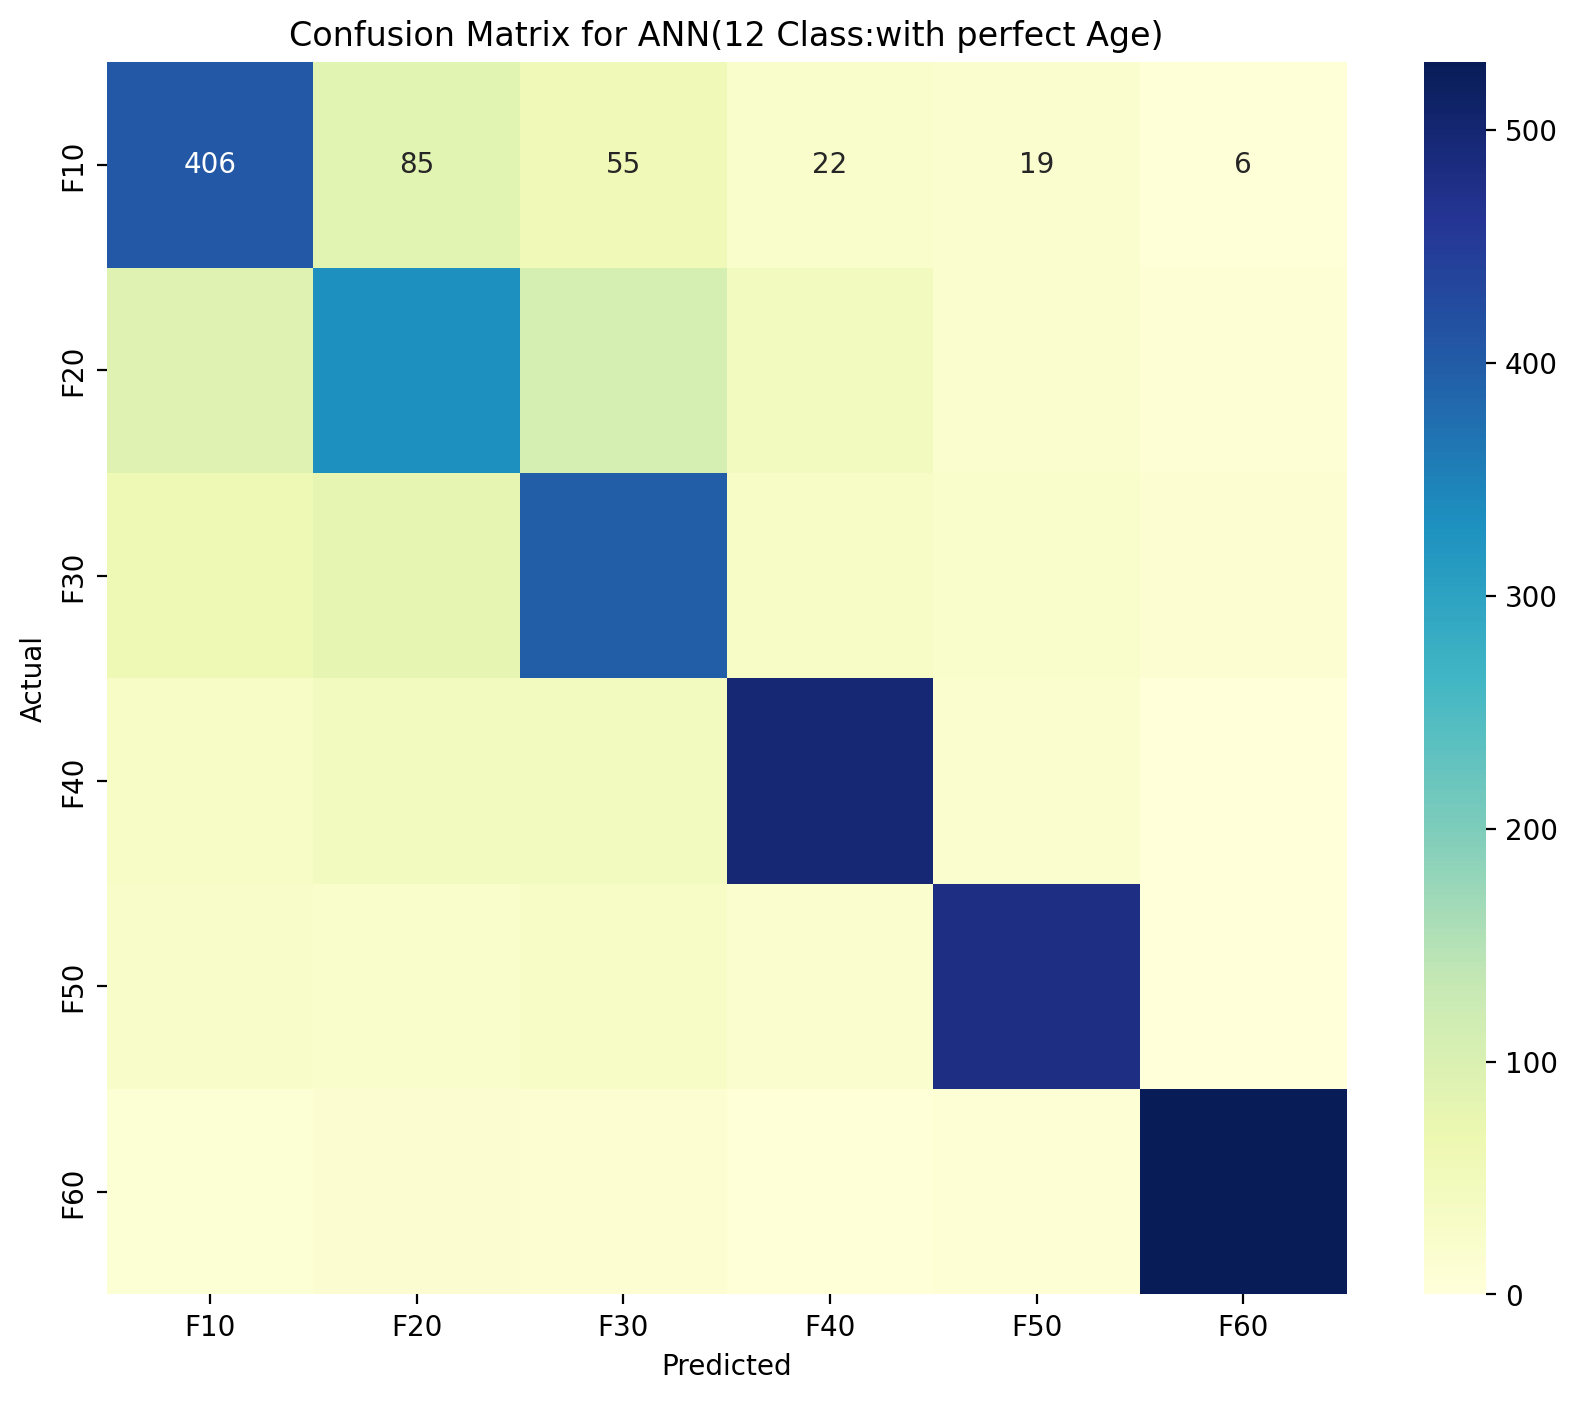

In [68]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
print(confusion_mat)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu",
           xticklabels=labels,
           yticklabels=labels)
plt.title('Confusion Matrix for ANN(12 Class:with perfect Age)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

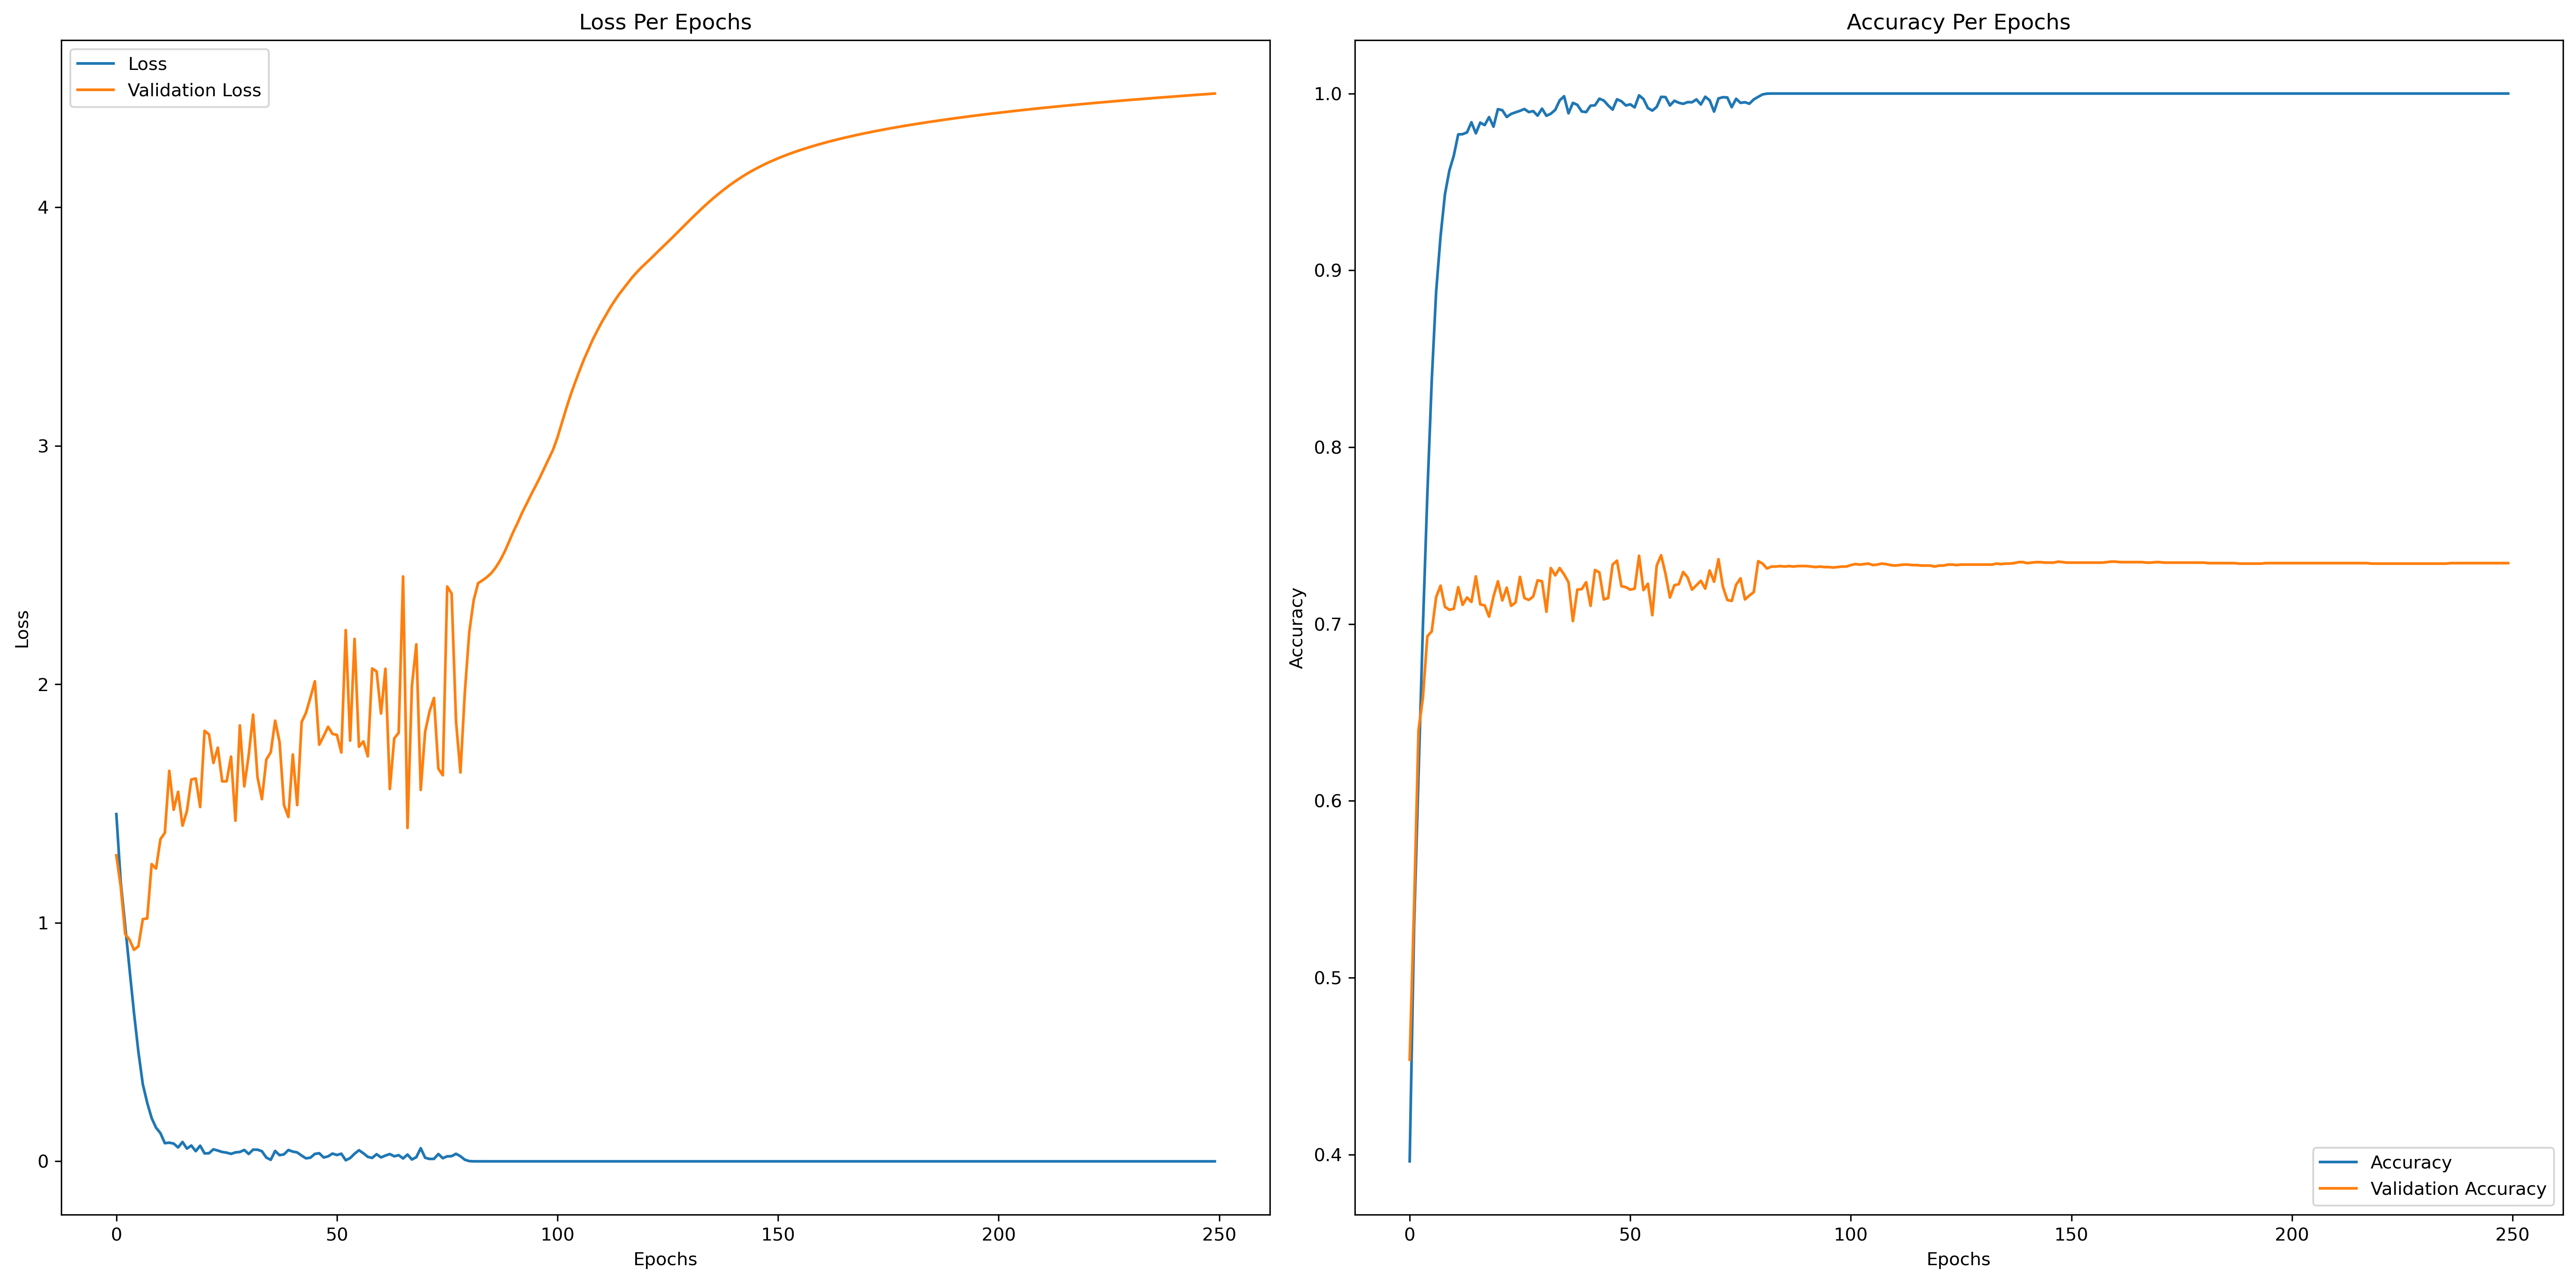

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[406  85  55  22  19   6]
 [ 91 332 108  44  20  10]
 [ 59  79 398  29  21  13]
 [ 29  44  45 498  19   0]
 [ 27  21  33  19 481   2]
 [ 12  15  14   6   9 529]]


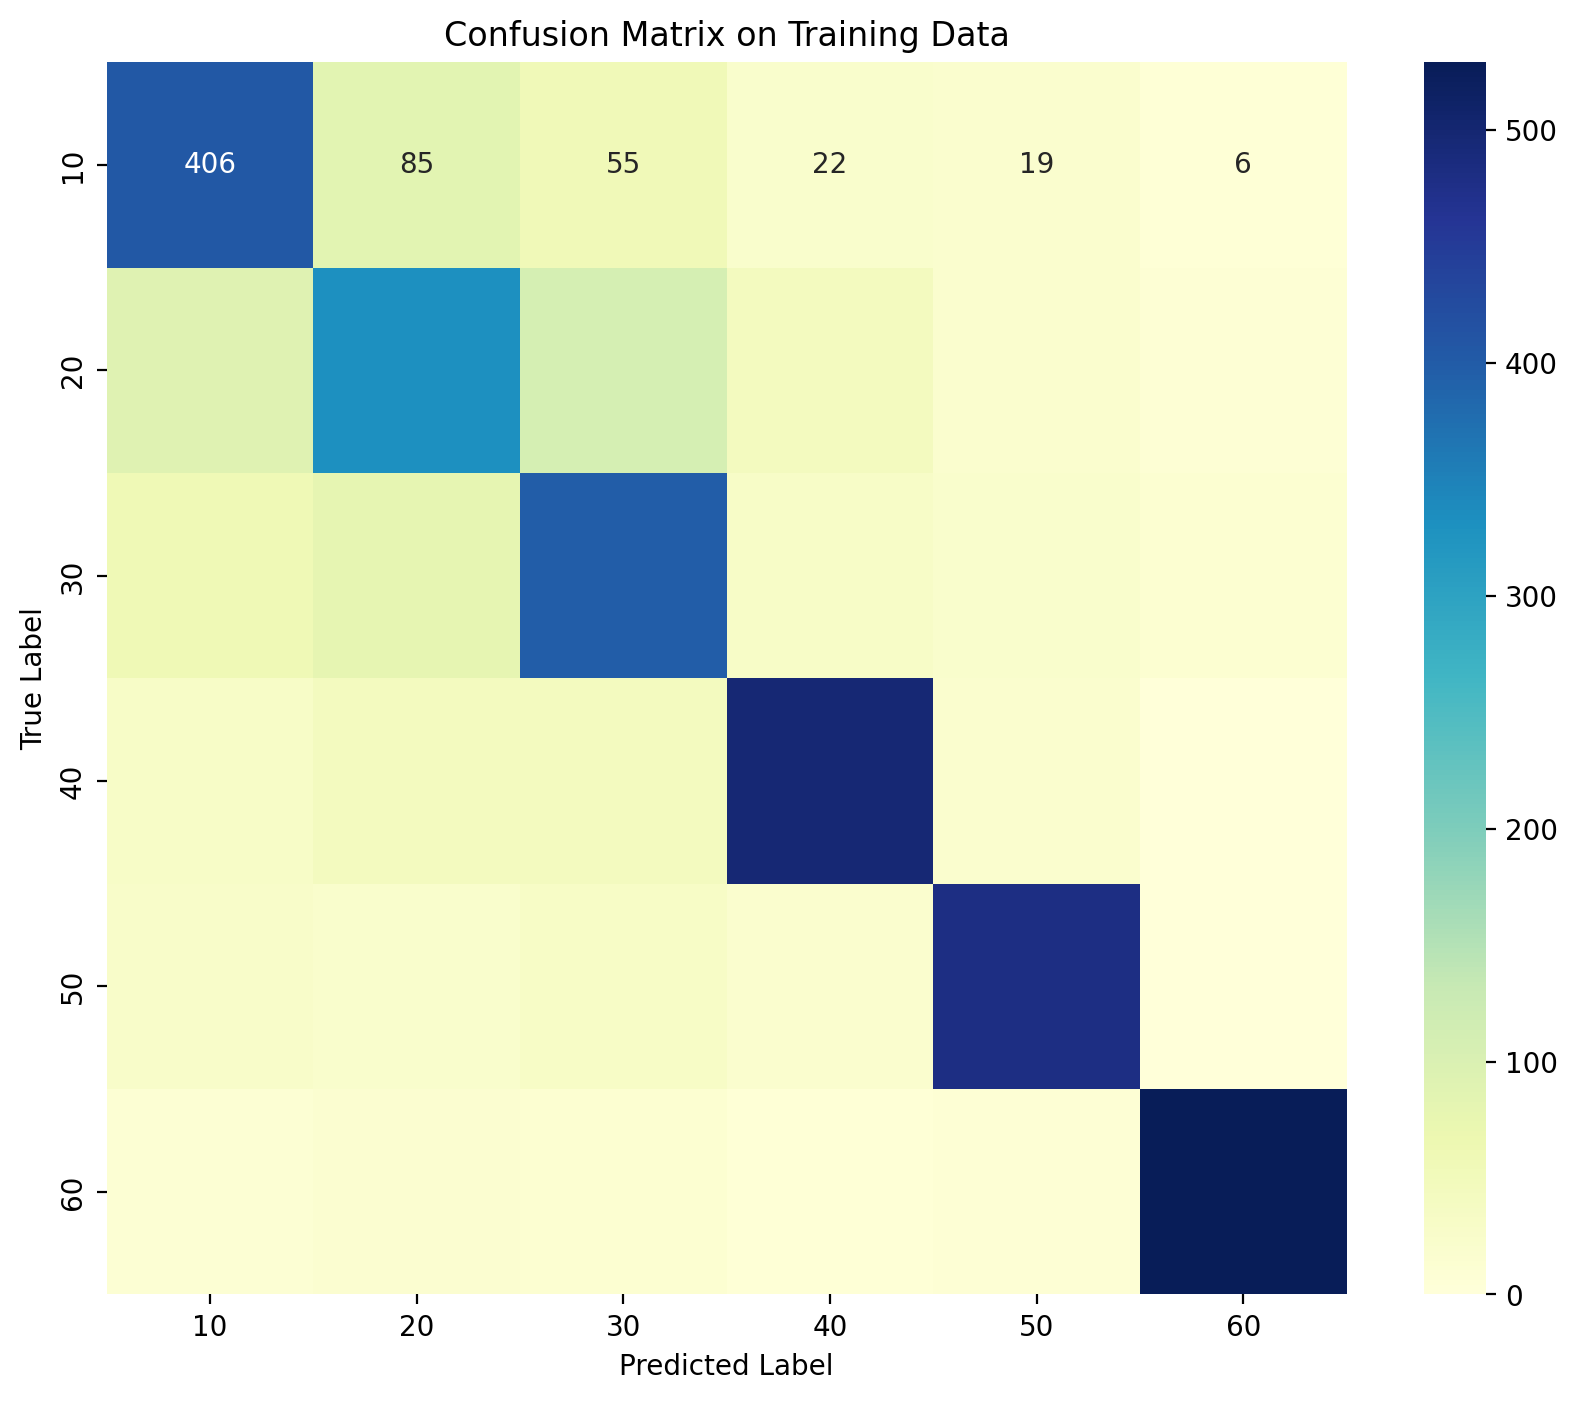

Accuracy   : 0.7344444444444445


In [73]:
train_hist_m1 = pd.DataFrame(cnn_results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = cnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = cnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
labels = ['F10', 'M10', 'F20', 'M20', 'F30', 'M30', 'F40', 'M40', 'F50', 'M50', 'F60', 'M60']
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

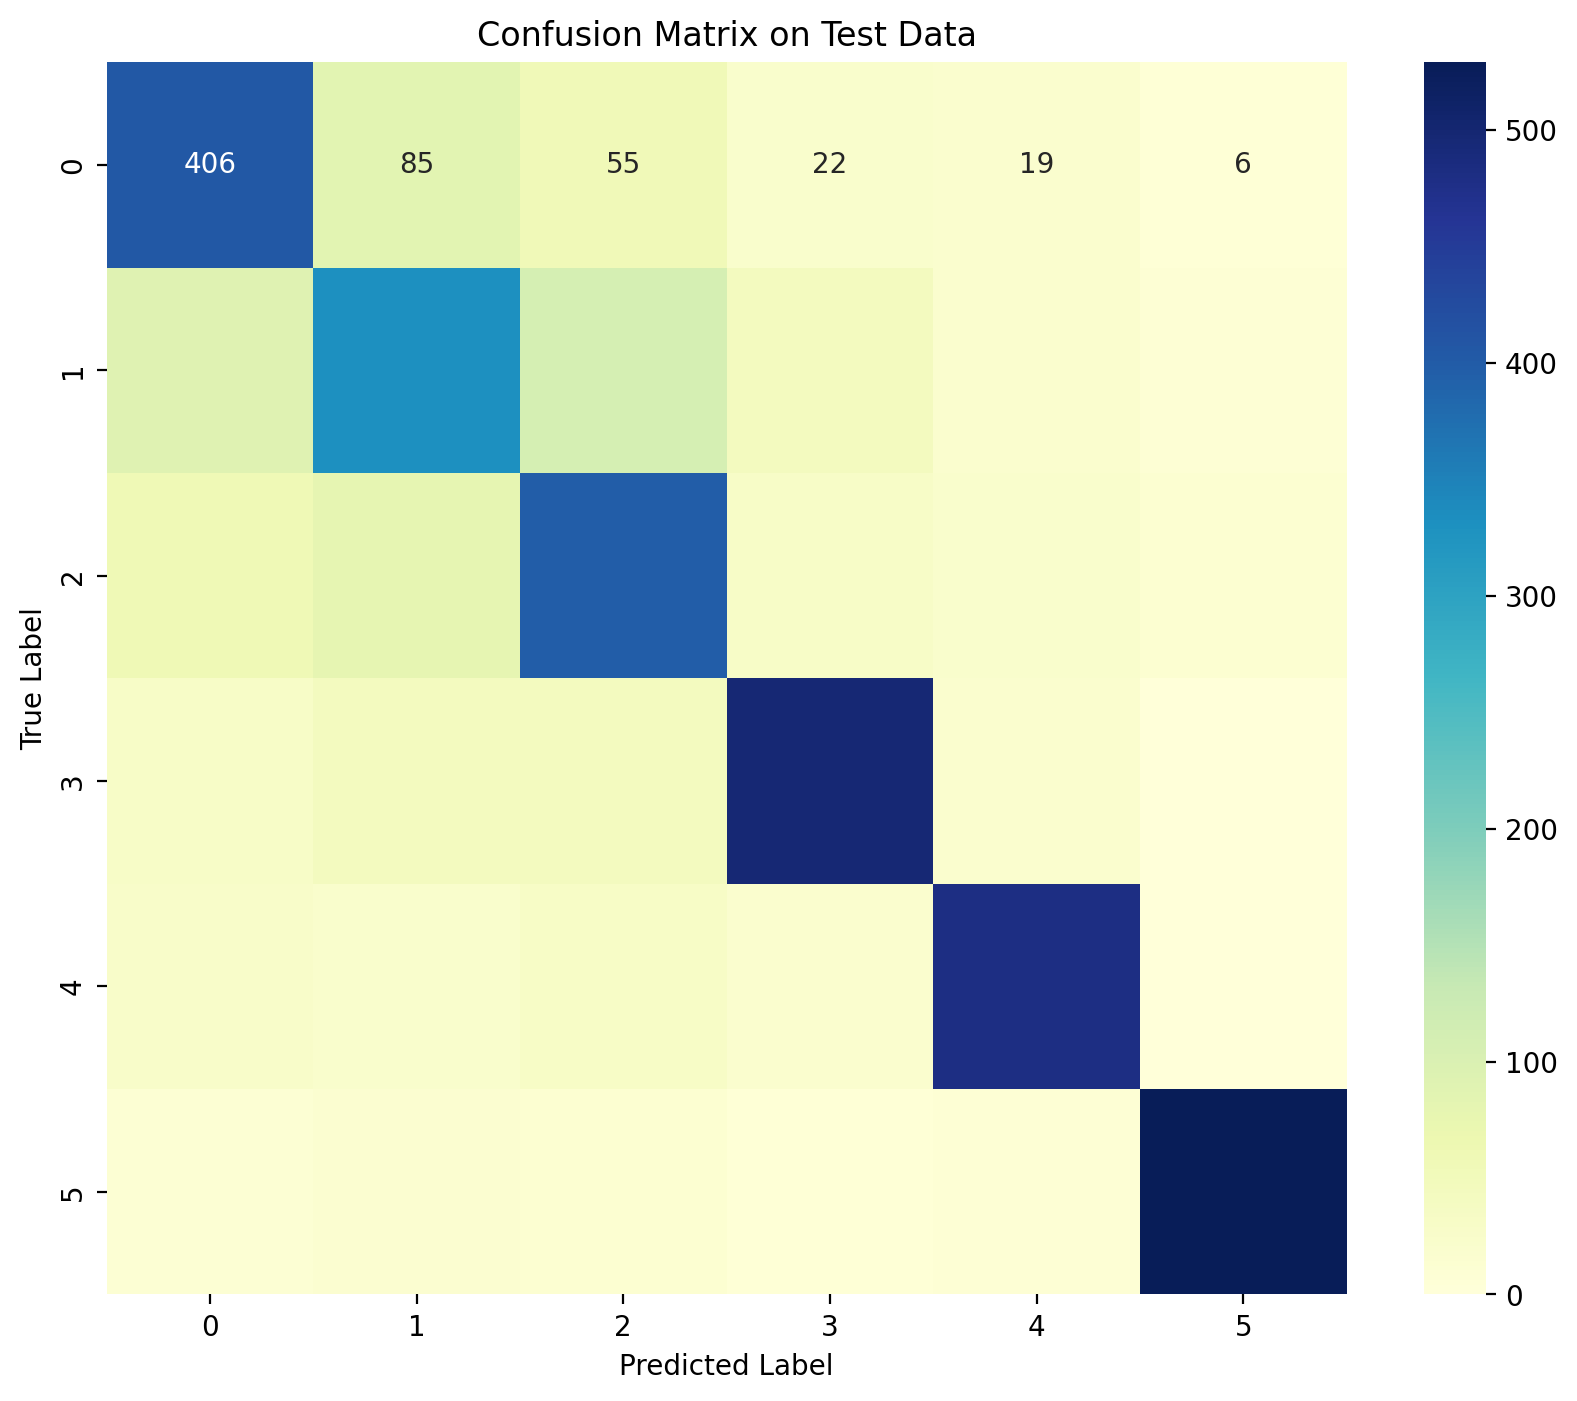

In [74]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Get the unique class labels
class_labels = np.unique(y_test.argmax(axis=1))

# Create the confusion matrix DataFrame
df_cm = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 3-LSTM

In [75]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1000, activation='relu'))
lstm_model.add(Dense(750, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_results=lstm_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.2039 - loss: 1.7628 - val_accuracy: 0.2811 - val_loss: 1.6849
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2679 - loss: 1.7051 - val_accuracy: 0.2767 - val_loss: 1.6746
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2947 - loss: 1.6772 - val_accuracy: 0.2803 - val_loss: 1.6896
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2981 - loss: 1.6618 - val_accuracy: 0.3186 - val_loss: 1.6422
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3144 - loss: 1.6427 - val_accuracy: 0.3358 - val_loss: 1.5951
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.3238 - loss: 1.6110 - val_accuracy: 0.3236 - val_loss: 1.6080
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3304 - loss: 1.6079 - val_accuracy: 0.3294 - val_loss: 1.5952
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.3421 - loss: 1

In [81]:
lstm_model.save("lstm_model.h5")
print("lstm_model  Saved")

lstm_model  Saved


In [82]:
# function to predict the feature
def LSTM_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(lstm_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("LSTM has predicted the class as  --> ", predicted_class[0])

In [83]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
LSTM_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
LSTM has predicted the class as  -->  M10


In [84]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
#y_pred = cnn_model.predict(X_test)
#y_pred_classes = np.argmax(y_pred, axis=1)


# Define the labels for the classification report
labels = ['M10', 'M20', 'M30', 'M40', 'M50', 'M60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       593
           1       0.30      0.29      0.29       605
           2       0.36      0.33      0.34       599
           3       0.61      0.63      0.62       635
           4       0.59      0.59      0.59       583
           5       0.78      0.76      0.77       585

    accuracy                           0.51      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.51      0.51      0.51      3600

              precision    recall  f1-score   support

         M10       0.40      0.44      0.42       593
         M20       0.30      0.29      0.29       605
         M30       0.36      0.33      0.34       599
         M40       0.61      0.63      0.62       635
         M50       0.59      0.59      0.59       583
         M60       0.78      0.76      0.77       585

    accuracy                        

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[262 128  80  50  50  23]
 [137 175 121  68  73  31]
 [119 119 196  64  74  27]
 [ 58  70  57 400  31  19]
 [ 49  53  63  49 344  25]
 [ 33  43  30  20  15 444]]


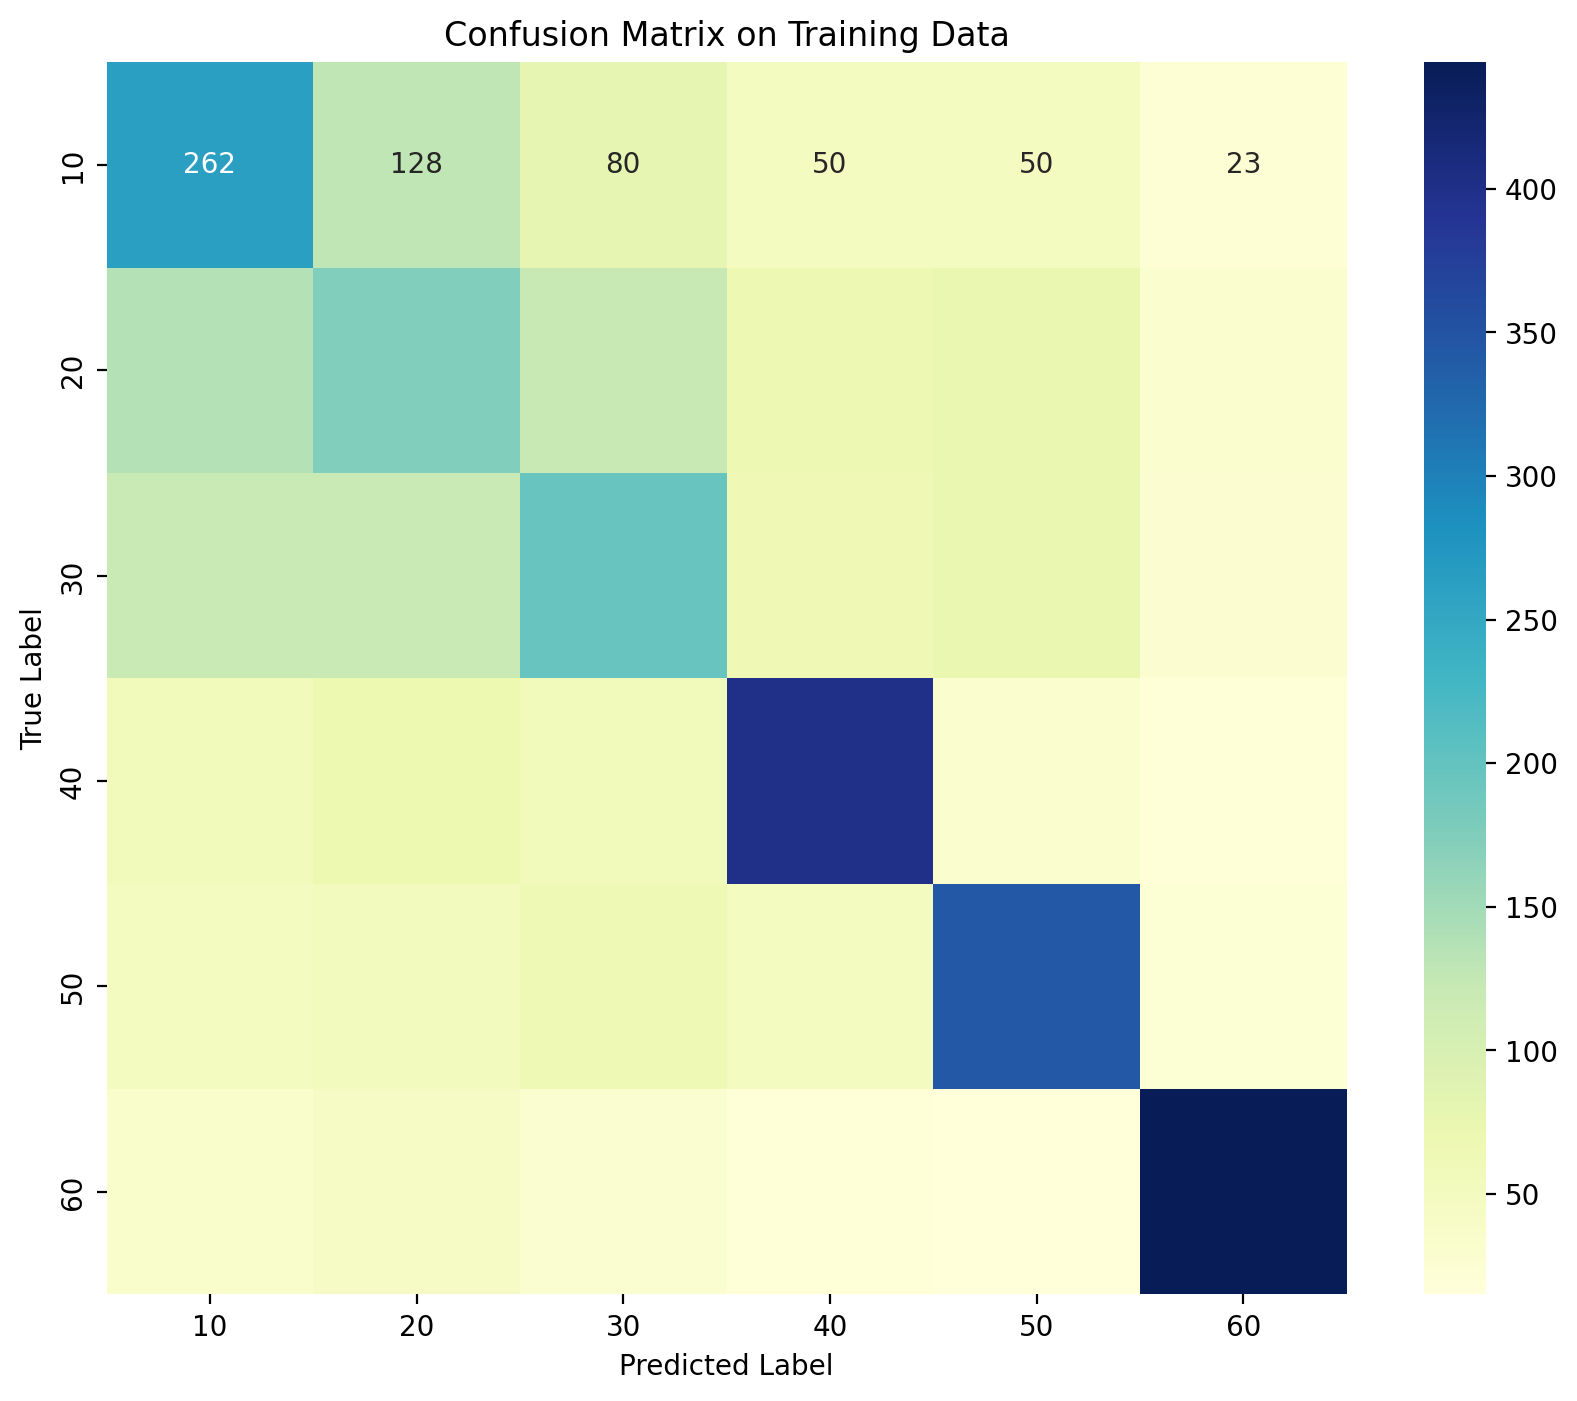

Accuracy   : 0.5058333333333334


In [86]:
train_hist_m3 = pd.DataFrame(lstm_results.history)
train_m3 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

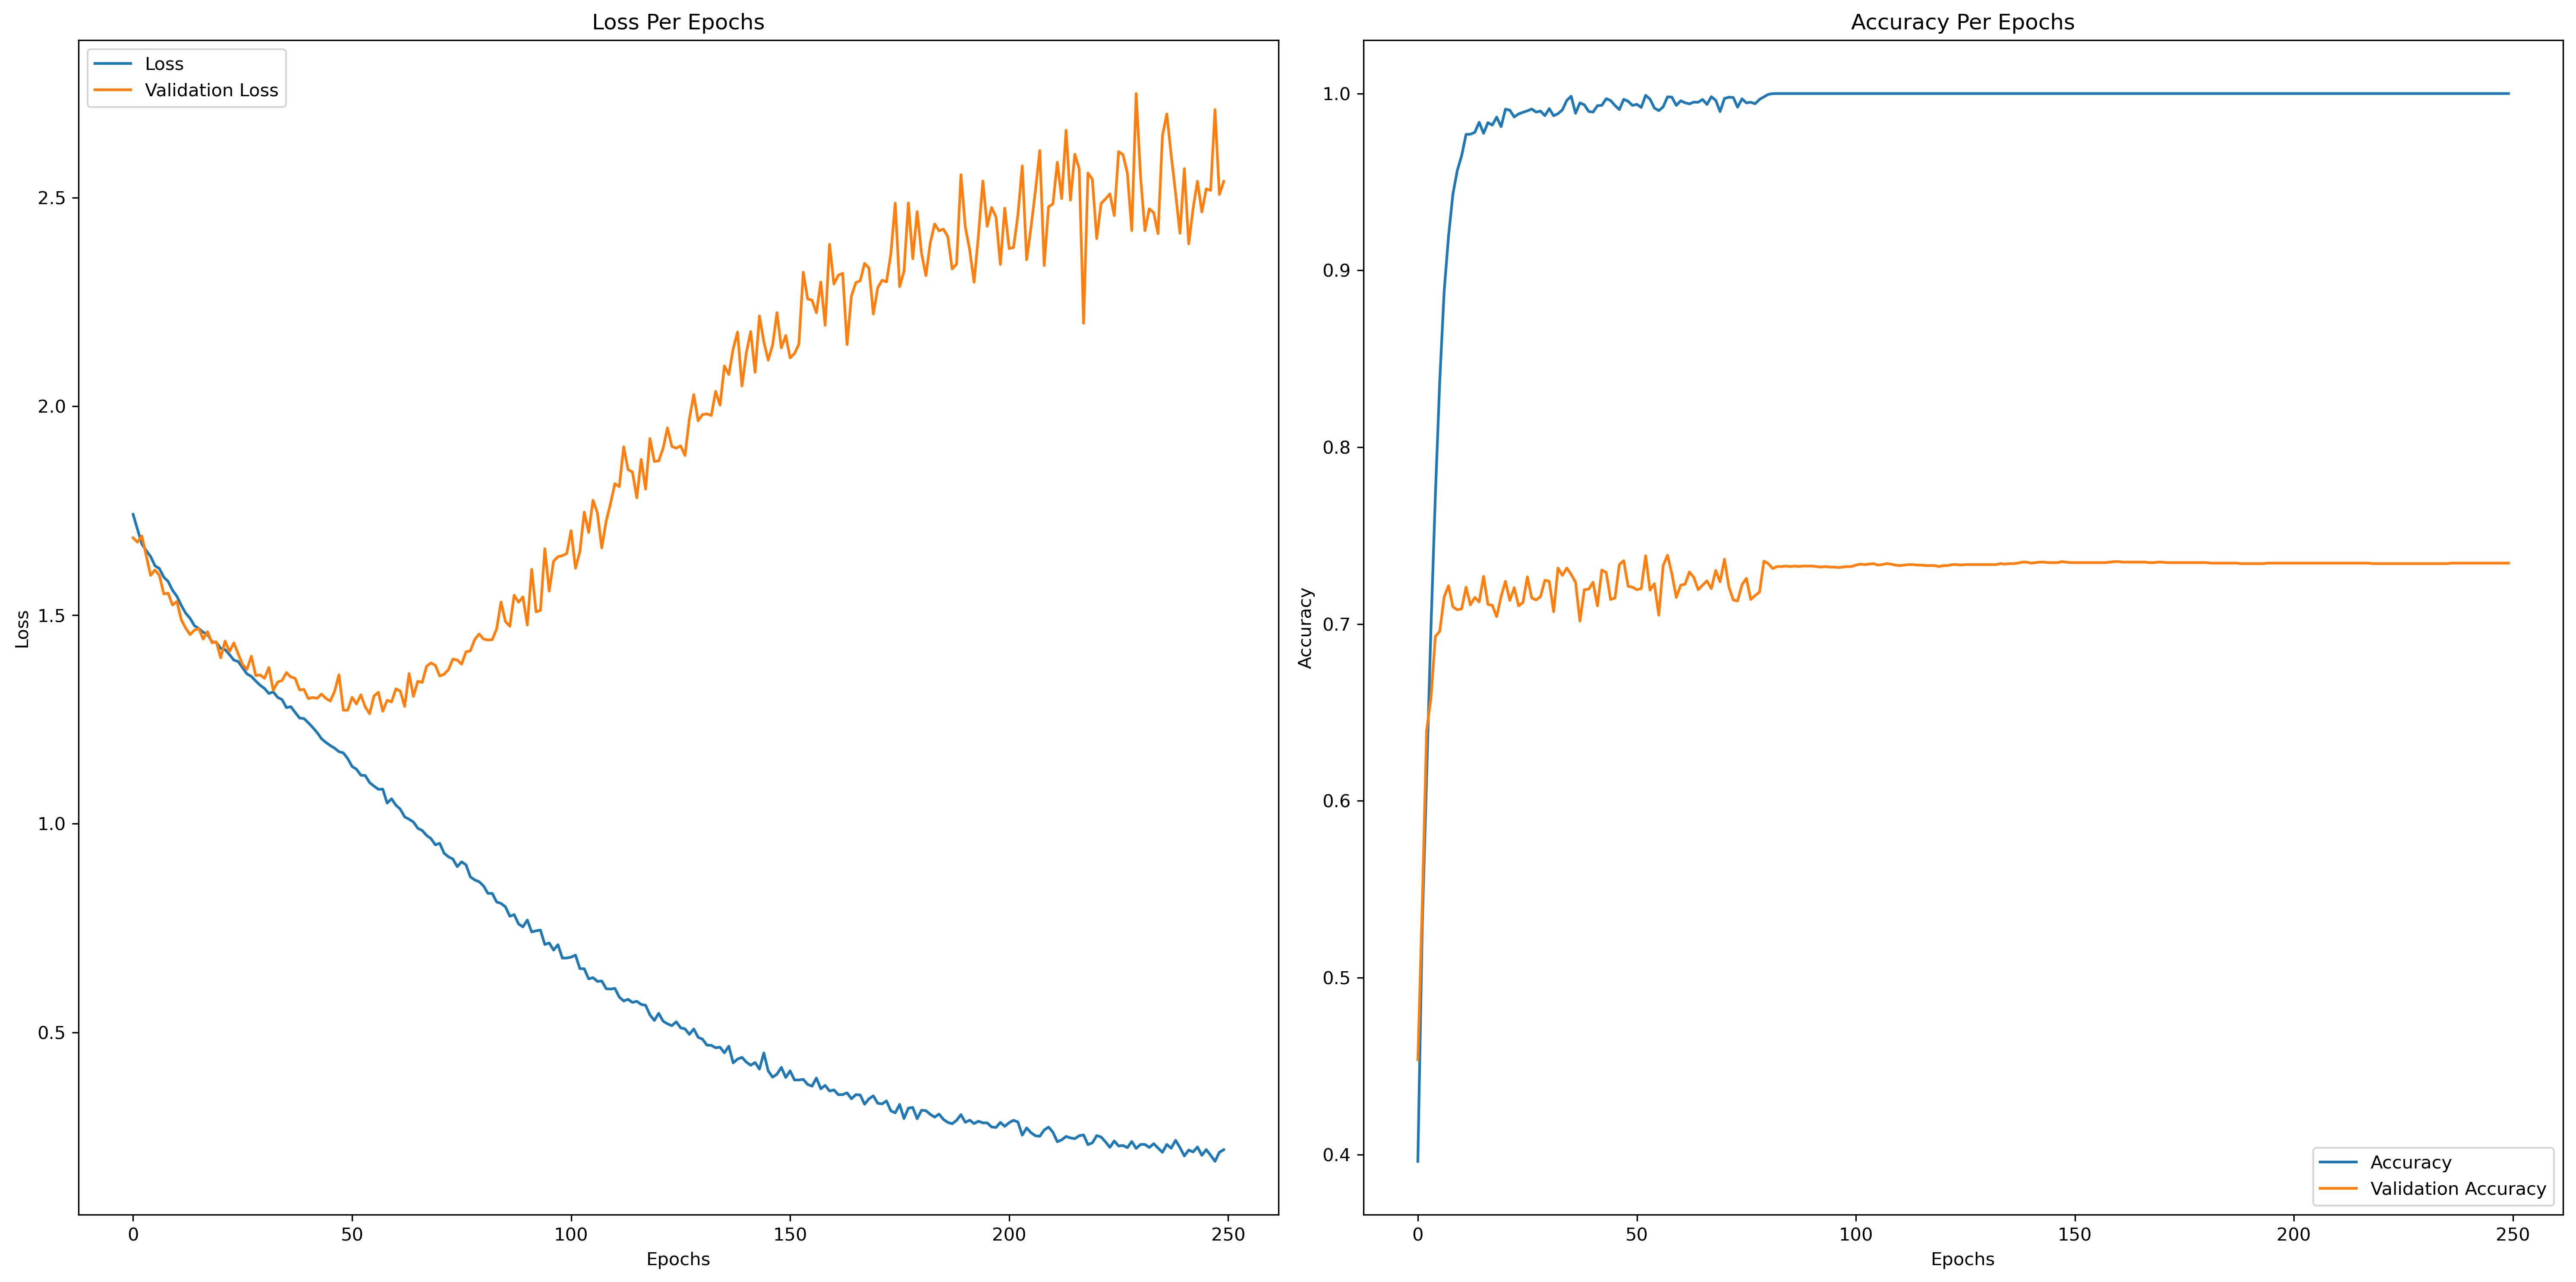

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

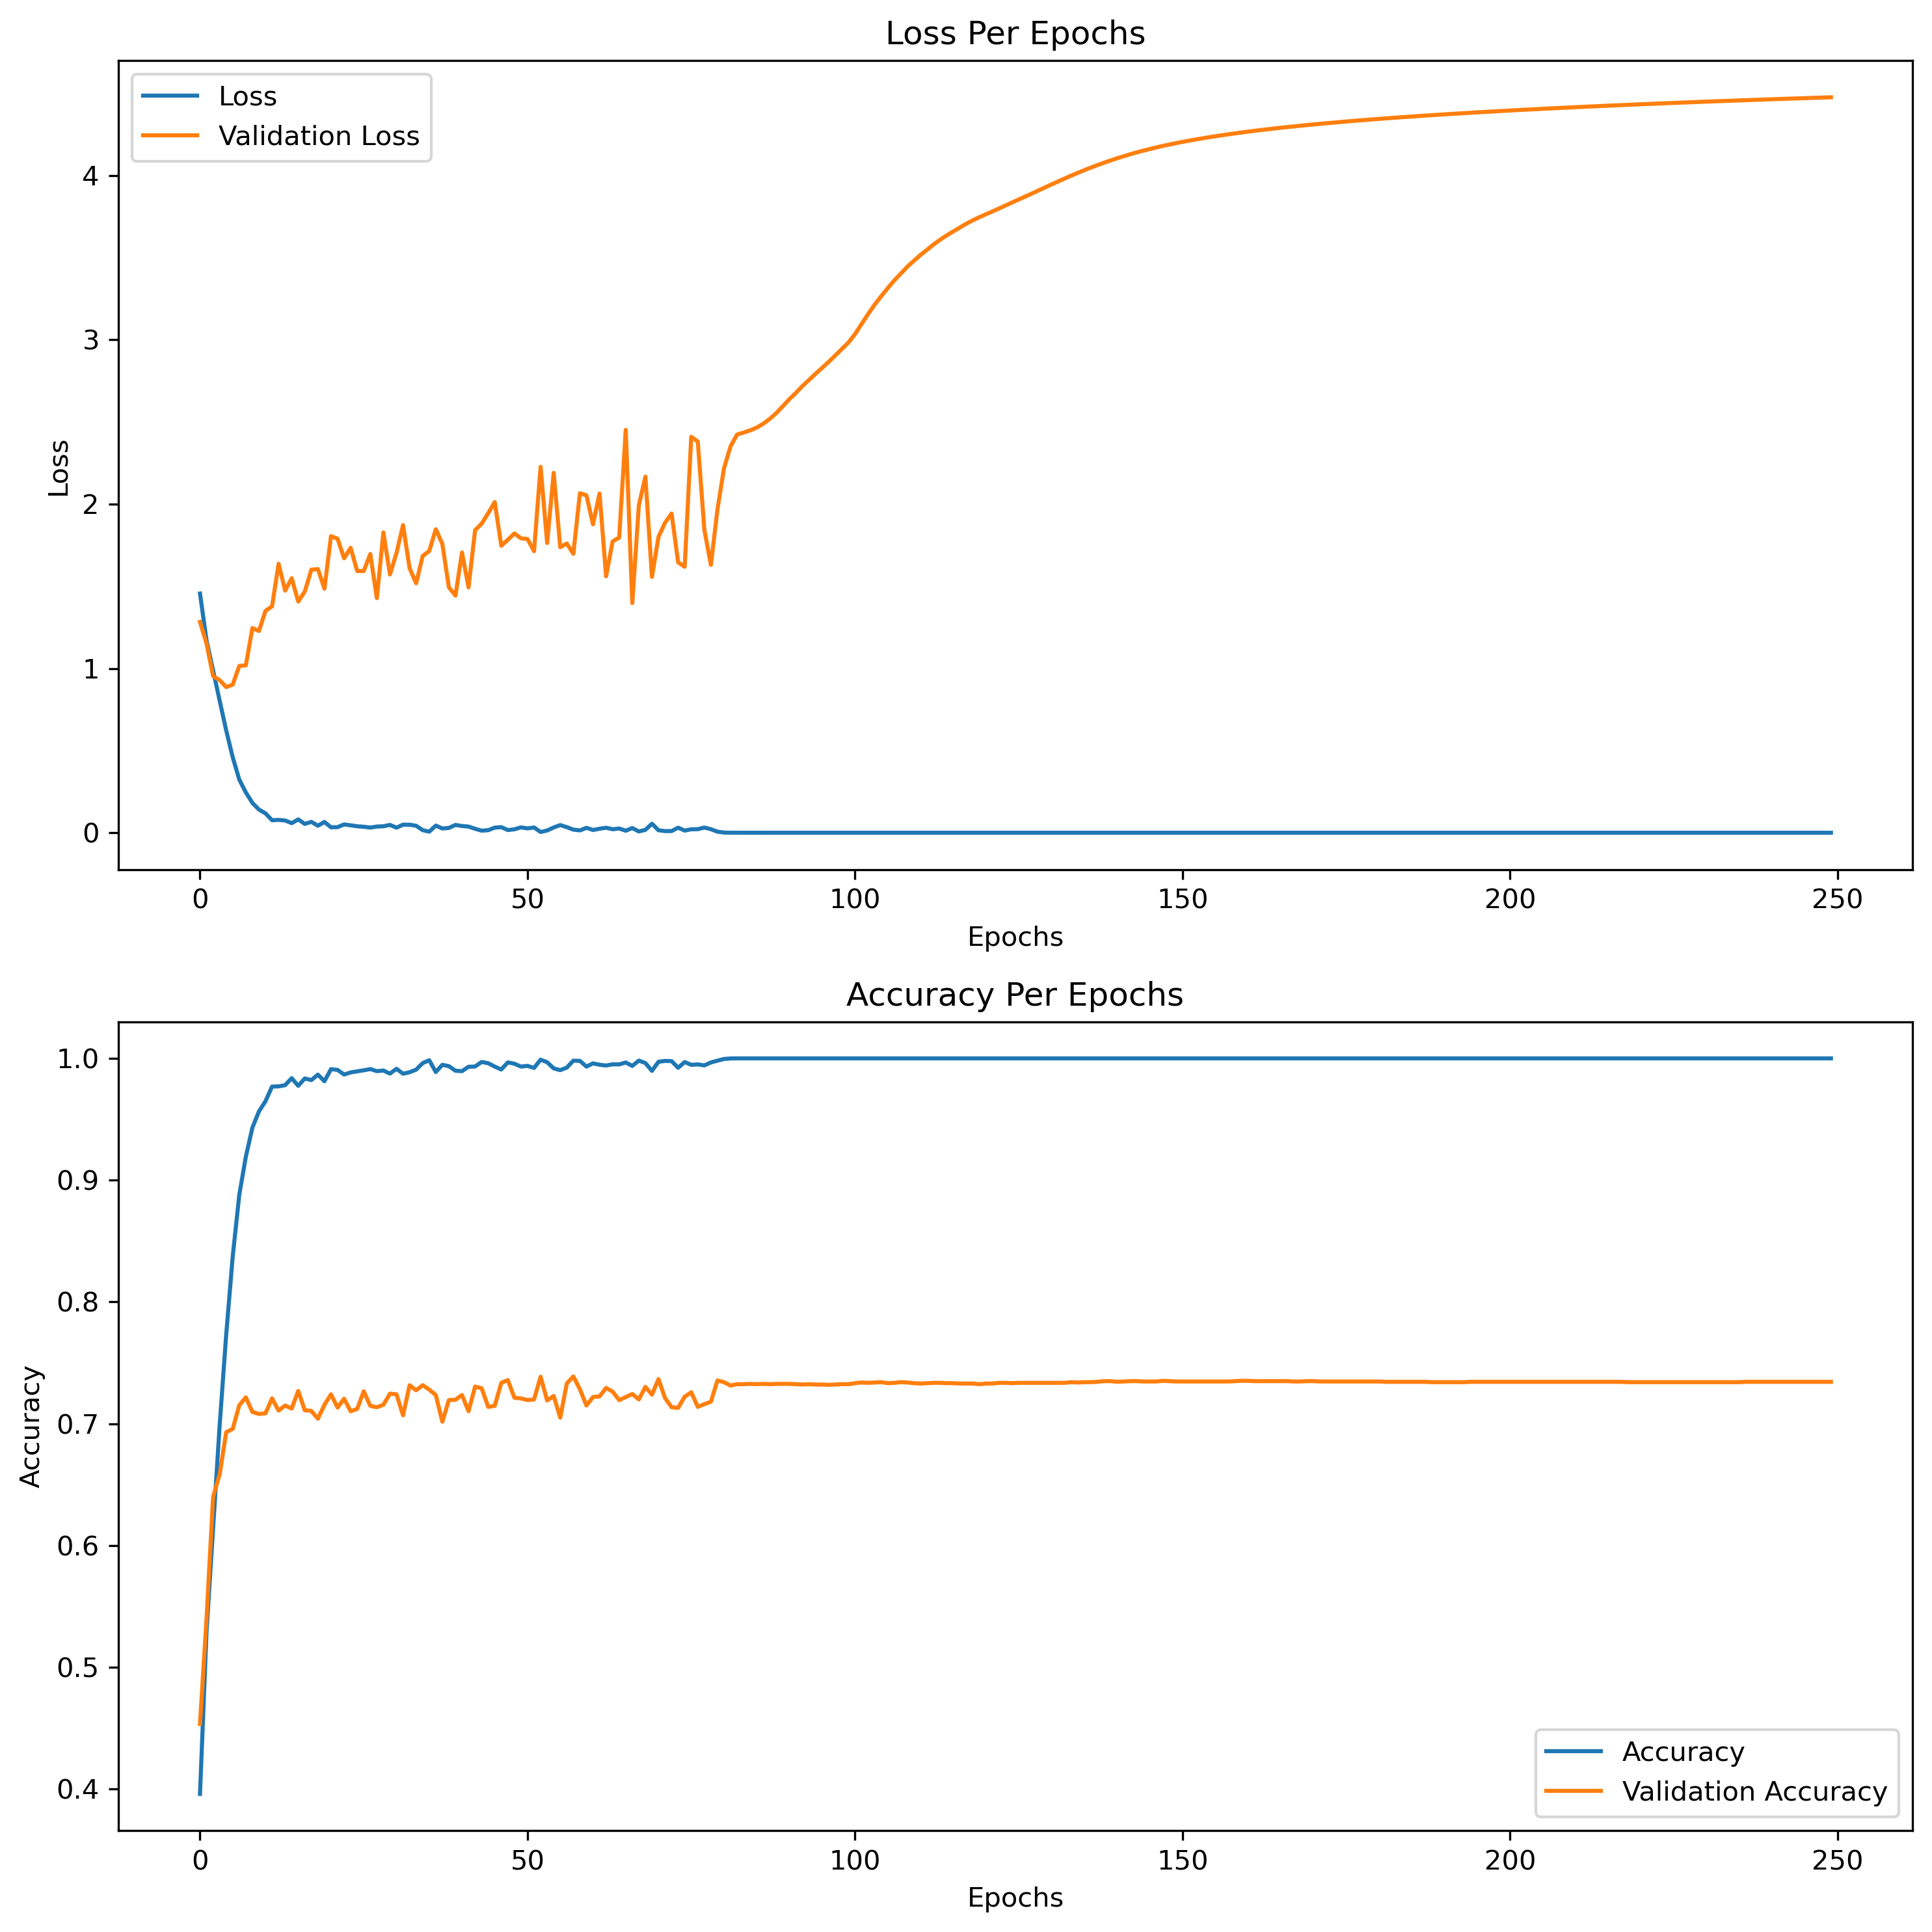

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(2, 1, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[262 128  80  50  50  23]
 [137 175 121  68  73  31]
 [119 119 196  64  74  27]
 [ 58  70  57 400  31  19]
 [ 49  53  63  49 344  25]
 [ 33  43  30  20  15 444]]


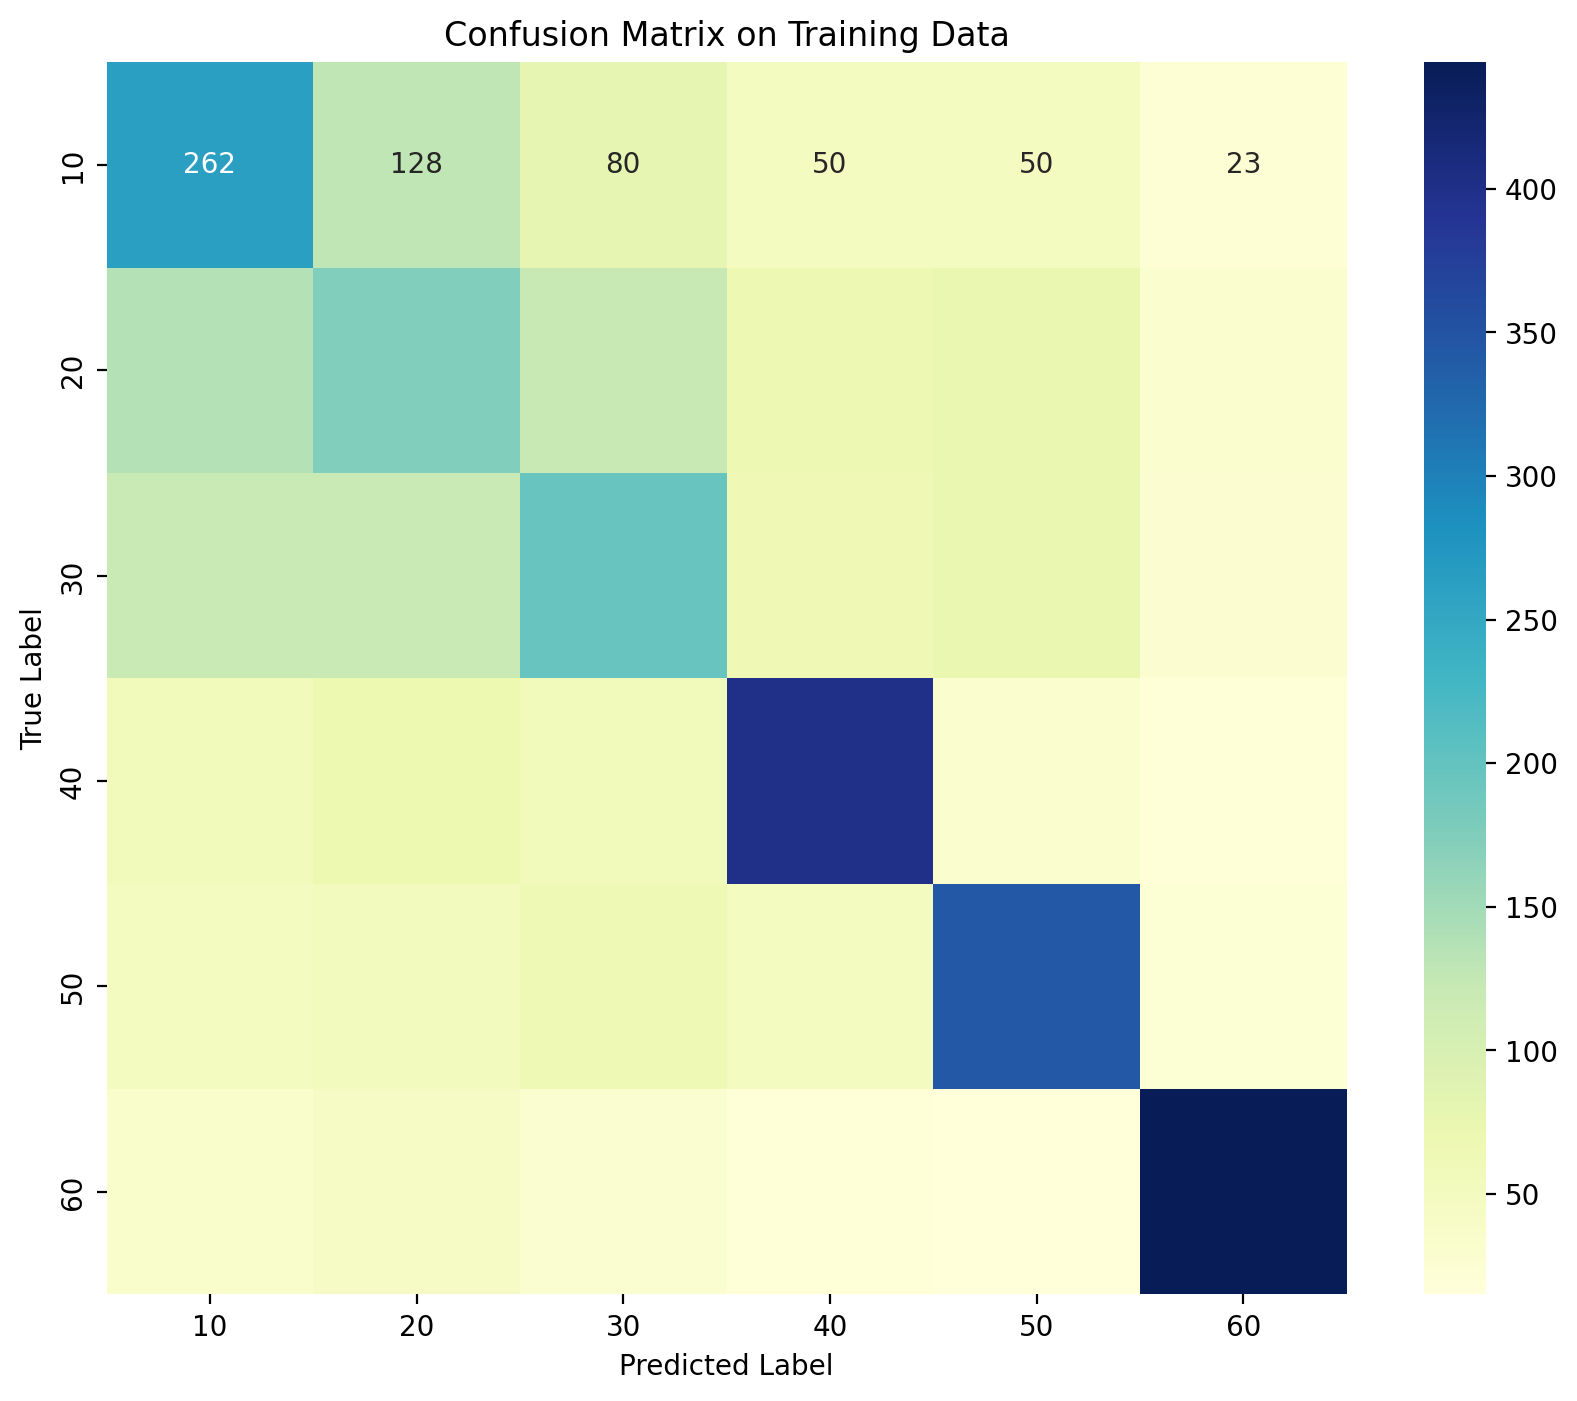

Accuracy   : 0.5058333333333334


In [89]:
# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

## RNN

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1000, activation='relu'))
rnn_model.add(Dense(750, activation='relu'))
rnn_model.add(Dense(500, activation='relu'))
rnn_model.add(Dense(250, activation='relu'))
rnn_model.add(Dense(100, activation='relu'))
rnn_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
rnn_model.add(Dense(num_classes, activation='softmax'))

rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_results=rnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.2153 - loss: 1.7637 - val_accuracy: 0.2439 - val_loss: 1.7194
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.2437 - loss: 1.7252 - val_accuracy: 0.2919 - val_loss: 1.6643
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.2743 - loss: 1.6963 - val_accuracy: 0.3000 - val_loss: 1.6644
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2962 - loss: 1.6562 - val_accuracy: 0.3153 - val_loss: 1.6362
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.3048 - loss: 1.6469 - val_accuracy: 0.3172 - val_loss: 1.6370
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3156 - loss: 1.6341 - val_accuracy: 0.3172 - val_loss: 1.6005
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3354 - loss: 1.6092 - val_accuracy: 0.3247 - val_loss: 1.6033
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3300 - loss: 1

In [92]:
lstm_model.save("rnn_model.h5")
print("rnn_model  Saved")

rnn_model  Saved


In [93]:
# function to predict the feature
def RNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(rnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("RNN has predicted the class as  --> ", predicted_class[0])

In [94]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
RNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
RNN has predicted the class as  -->  M20


In [95]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['M10', 'M20', 'M30', 'M40', 'M50', 'M60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.39      0.41      0.40       593
           1       0.31      0.33      0.32       605
           2       0.36      0.31      0.33       599
           3       0.60      0.62      0.61       635
           4       0.55      0.53      0.54       583
           5       0.76      0.76      0.76       585

    accuracy                           0.49      3600
   macro avg       0.49      0.49      0.49      3600
weighted avg       0.49      0.49      0.49      3600

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

         M10       0.39      0.41      0.40       593
         M20       0.31      0.33      0.32       605
         M30       0.36      0.31      0.33       599
         M40       0.60      0.62      0.61       635
         M50       0.55      0.53      0.54       583
         M60       0.76      0.76      0.76       

In [96]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'M10', 'F20', 'M20', 'F30', 'M30', 'F40', 'M40', 'F50', 'M50', 'F60', 'M60']

# Generate classification report
print(classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels))

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


ValueError: Number of classes, 6, does not match size of target_names, 12. Try specifying the labels parameter

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[244 133  76  57  58  25]
 [118 201 110  69  69  38]
 [121 131 185  64  66  32]
 [ 47  66  60 395  46  21]
 [ 62  71  61  59 310  20]
 [ 36  49  29  16  13 442]]


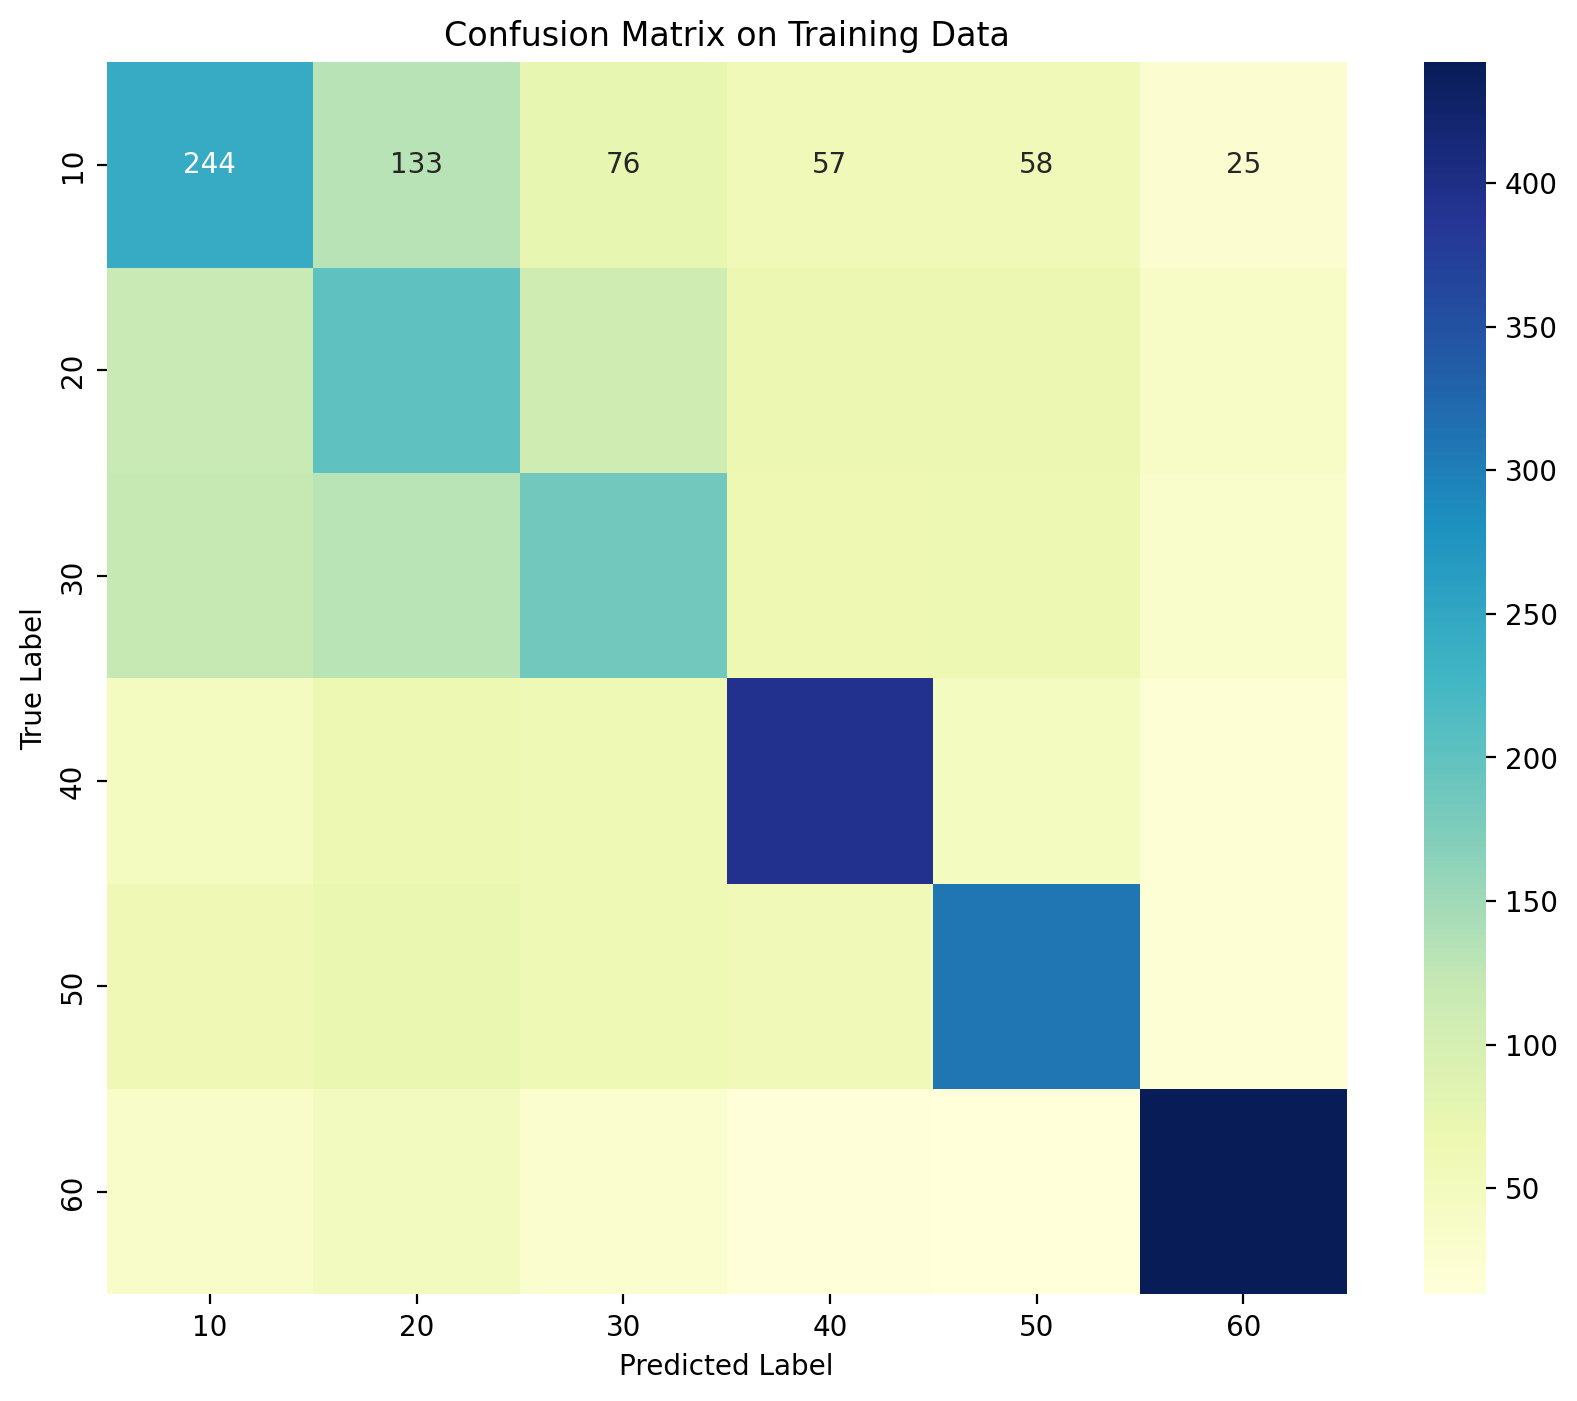

Accuracy   : 0.4936111111111111


In [97]:
train_hist_m4 = pd.DataFrame(lstm_results.history)
train_m4 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = rnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = rnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

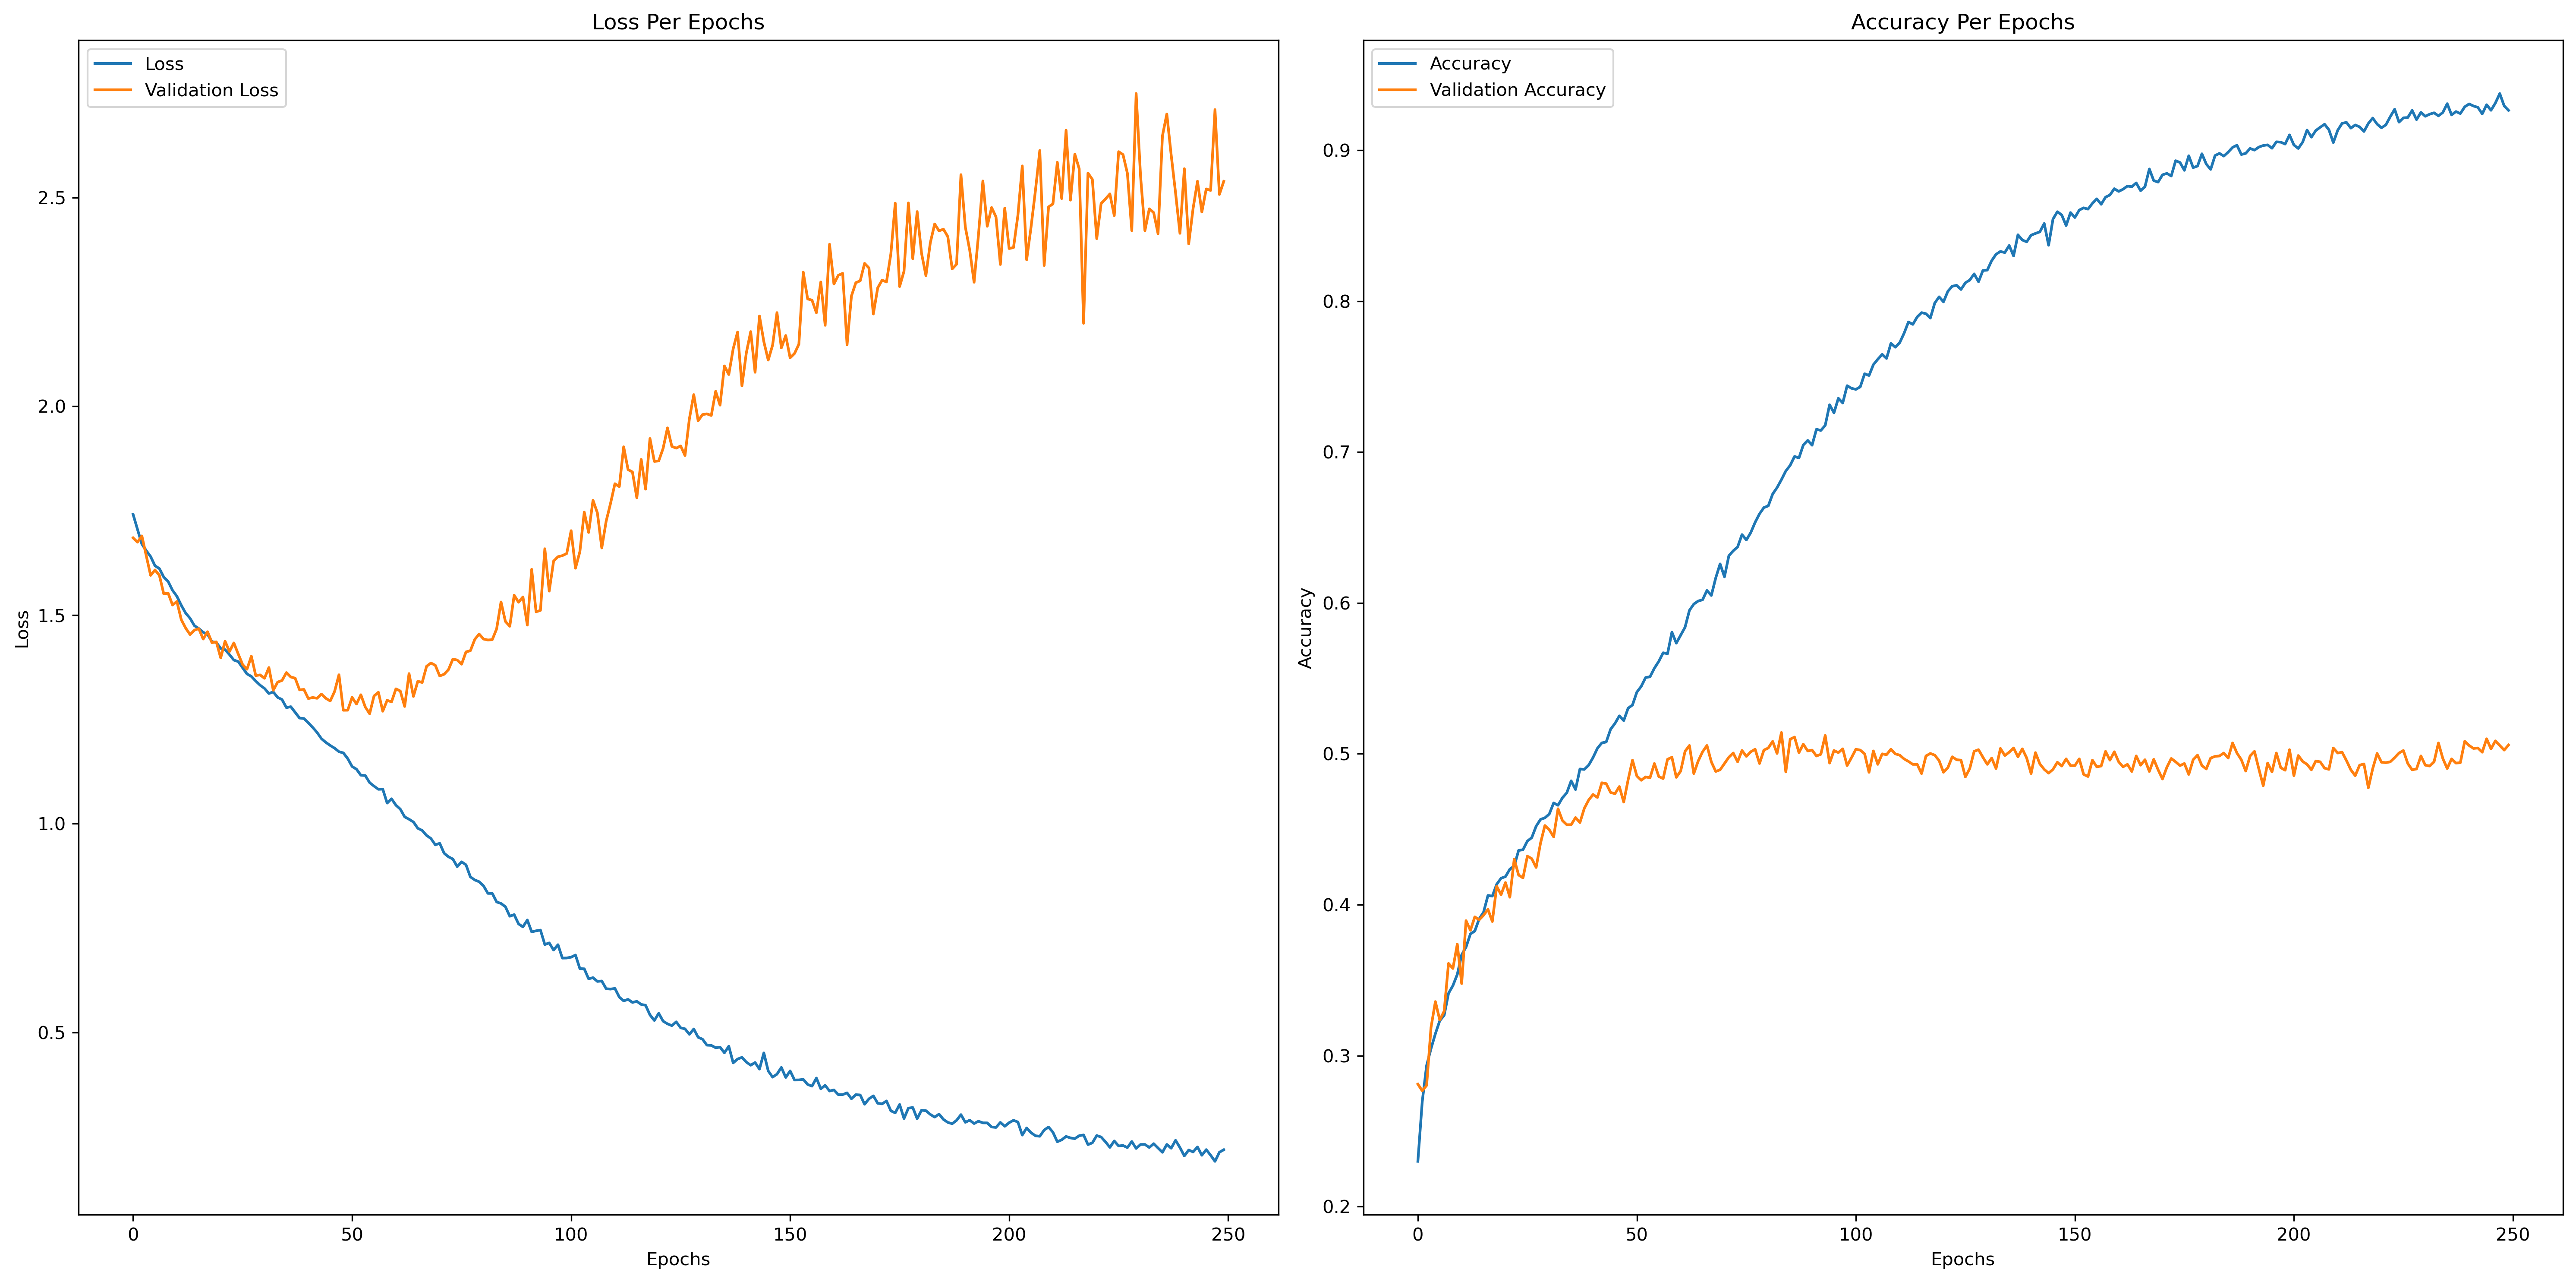

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m4[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m4[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()